# **Data Analysis of Motor Vechile Collisions in USA**



# **Loading the Data and necessary libraries**

In [3]:
#importing the necessary libraries for the Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
#Path of the file from which the data is taken
file = '/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Vehicles.csv'

In [5]:
#Read the csv file and converted it into a dataframe.
df = pd.read_csv(file)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Data Pre-Processing**

In [6]:
#Checked the shape to identify the total no of rows and columns
df.shape

(3704406, 25)

In [7]:
#To see the representation of CRASH DATE column to make appropriate patterns for extraction of data.
df['CRASH_DATE']

0          09/07/2012
1          09/23/2019
2          10/02/2015
3          10/04/2015
4          04/25/2013
              ...    
3704401    11/15/2021
3704402    11/24/2021
3704403    11/11/2021
3704404    11/06/2021
3704405    12/02/2021
Name: CRASH_DATE, Length: 3704406, dtype: object

In [8]:

df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

In [9]:
df.head(5)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,10385780,100201,2012-09-07,9:03,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
2,14887647,3307608,2015-10-02,17:18,2,NY,TAXI,NaN,NaN,NaN,...,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver Inattention/Distraction,NaN
3,14889754,3308693,2015-10-04,20:34,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
4,14400270,297666,2013-04-25,21:15,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Vehicular,NaN


In [10]:
# df['CRASH_DATE'] = df['CRASH_DATE'].dt.strftime('%d-%m-%Y')

In [11]:
start_date = '2018-09-01'
end_date = '2020-08-31'
# mvc_data = df.query('CRASH_DATE <= @end_date and CRASH_DATE >= @start_date')
mask = (df['CRASH_DATE'] >= start_date) & (df['CRASH_DATE'] <= end_date)

In [12]:
df2 = df.loc[mask]

In [13]:
df2.shape

(741086, 25)

In [14]:
# Stored the crash data of the years 2015 and 2021 to a csv file "MVC.csv" for future use.
mvc_data = df2.to_csv('/content/drive/MyDrive/MVC.csv')

# **Crash data between the date 1st September 2018 to 31st August 2020**

In [15]:
# Loaded the the data of the year 2015 and 2021 and made it to a dataframe "new_df and replacing all "?" and"--" as np.NaN if they are present as missing values."
new_data = '/content/drive/MyDrive/MVC.csv'
missing_values = ["?", "--"]
new_df = pd.read_csv(new_data, na_values= missing_values)

In [16]:
new_df.shape

(741086, 26)

**Crash data between the dates 1st September 2018 to 31st August 2020 consist of 741086 accidents. That is 20% of the accidents happened in during this period.**






#**Initial Data Pre-Processing**

**Replace all missing values with NaN**

In [17]:
new_df.replace({"?":np.NaN,"--":np.NaN}, inplace = True)

**Finding Missing Values**

In [18]:
# To find the columns that contain NaN values.
new_df.isna().any()

Unnamed: 0                     False
UNIQUE_ID                      False
COLLISION_ID                   False
CRASH_DATE                     False
CRASH_TIME                     False
VEHICLE_ID                     False
STATE_REGISTRATION              True
VEHICLE_TYPE                    True
VEHICLE_MAKE                    True
VEHICLE_MODEL                   True
VEHICLE_YEAR                    True
TRAVEL_DIRECTION                True
VEHICLE_OCCUPANTS               True
DRIVER_SEX                      True
DRIVER_LICENSE_STATUS           True
DRIVER_LICENSE_JURISDICTION     True
PRE_CRASH                       True
POINT_OF_IMPACT                 True
VEHICLE_DAMAGE                  True
VEHICLE_DAMAGE_1                True
VEHICLE_DAMAGE_2                True
VEHICLE_DAMAGE_3                True
PUBLIC_PROPERTY_DAMAGE         False
PUBLIC_PROPERTY_DAMAGE_TYPE     True
CONTRIBUTING_FACTOR_1           True
CONTRIBUTING_FACTOR_2           True
dtype: bool

In [19]:
# To find the no of missing values in each column.
new_df.isna().sum()

Unnamed: 0                          0
UNIQUE_ID                           0
COLLISION_ID                        0
CRASH_DATE                          0
CRASH_TIME                          0
VEHICLE_ID                          0
STATE_REGISTRATION              74525
VEHICLE_TYPE                    59835
VEHICLE_MAKE                    85791
VEHICLE_MODEL                  741086
VEHICLE_YEAR                    88815
TRAVEL_DIRECTION                37107
VEHICLE_OCCUPANTS               64914
DRIVER_SEX                     175432
DRIVER_LICENSE_STATUS          192516
DRIVER_LICENSE_JURISDICTION    192465
PRE_CRASH                       44956
POINT_OF_IMPACT                 45833
VEHICLE_DAMAGE                  51541
VEHICLE_DAMAGE_1               293707
VEHICLE_DAMAGE_2               404362
VEHICLE_DAMAGE_3               483146
PUBLIC_PROPERTY_DAMAGE              0
PUBLIC_PROPERTY_DAMAGE_TYPE    734583
CONTRIBUTING_FACTOR_1           35702
CONTRIBUTING_FACTOR_2           41405
dtype: int64

In [20]:
new_df.head(5)

,Unnamed: 0,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
1,6,19138701,4229067,2019-10-24,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,NaN,...,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
2,13,19140791,4229563,2019-10-21,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW -CAR/SUV,NaN,...,Going Straight Ahead,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified
3,14,19694316,4322767,2020-06-06,18:30,fdc195a7-8127-4c00-834d-bac78b0cf88e,NaN,Bike,NaN,NaN,...,Going Straight Ahead,Center Front End,No Damage,No Damage,No Damage,No Damage,N,NaN,Traffic Control Disregarded,Unspecified
4,19,19140656,4229538,2019-10-24,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,...,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified


In [21]:
""" Column 'Unnamed: 0' represented the previous indexing of the data before extraction no it is of no use so we can drop it. The column 'VEHICLE_MODEL' contains 
only NaN values for the entire rows so we can drop that too."""
data = new_df.drop(labels = ['Unnamed: 0', 'VEHICLE_MODEL'], axis = 1)

In [22]:
data.isna().sum()

UNIQUE_ID                           0
COLLISION_ID                        0
CRASH_DATE                          0
CRASH_TIME                          0
VEHICLE_ID                          0
STATE_REGISTRATION              74525
VEHICLE_TYPE                    59835
VEHICLE_MAKE                    85791
VEHICLE_YEAR                    88815
TRAVEL_DIRECTION                37107
VEHICLE_OCCUPANTS               64914
DRIVER_SEX                     175432
DRIVER_LICENSE_STATUS          192516
DRIVER_LICENSE_JURISDICTION    192465
PRE_CRASH                       44956
POINT_OF_IMPACT                 45833
VEHICLE_DAMAGE                  51541
VEHICLE_DAMAGE_1               293707
VEHICLE_DAMAGE_2               404362
VEHICLE_DAMAGE_3               483146
PUBLIC_PROPERTY_DAMAGE              0
PUBLIC_PROPERTY_DAMAGE_TYPE    734583
CONTRIBUTING_FACTOR_1           35702
CONTRIBUTING_FACTOR_2           41405
dtype: int64

In [23]:
data['CRASH_DATE'] = pd.to_datetime(data['CRASH_DATE'])

In [24]:
data['YEAR'], data['MONTH'] , data['DAY']= data['CRASH_DATE'].dt.year, data['CRASH_DATE'].dt.month, data['CRASH_DATE'].dt.day


In [25]:
data.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_YEAR,TRAVEL_DIRECTION,...,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,YEAR,MONTH,DAY
0,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,2002.0,North,...,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified,2019,9,23
1,19138701,4229067,2019-10-24,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,2006.0,East,...,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10,24
2,19140791,4229563,2019-10-21,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW -CAR/SUV,2006.0,North,...,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified,2019,10,21
3,19694316,4322767,2020-06-06,18:30,fdc195a7-8127-4c00-834d-bac78b0cf88e,NaN,Bike,NaN,NaN,South,...,No Damage,No Damage,No Damage,N,NaN,Traffic Control Disregarded,Unspecified,2020,6,6
4,19140656,4229538,2019-10-24,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,2018.0,North,...,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10,24


In [26]:
data.drop(labels='DAY', axis = 1, inplace = True)

In [27]:
data.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'VEHICLE_ID',
       'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE', 'VEHICLE_YEAR',
       'TRAVEL_DIRECTION', 'VEHICLE_OCCUPANTS', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT', 'VEHICLE_DAMAGE', 'VEHICLE_DAMAGE_1',
       'VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3', 'PUBLIC_PROPERTY_DAMAGE',
       'PUBLIC_PROPERTY_DAMAGE_TYPE', 'CONTRIBUTING_FACTOR_1',
       'CONTRIBUTING_FACTOR_2', 'YEAR', 'MONTH'],
      dtype='object')

In [28]:
#There can be chances of empty values that are not np.NaN, ??, -- in the dataset so we have to fill those with np.NaN and finally remove it for proper analysis.
data = data.reindex(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'YEAR', 'MONTH', 'CRASH_TIME', 'VEHICLE_ID',
       'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE', 'VEHICLE_YEAR',
       'TRAVEL_DIRECTION', 'VEHICLE_OCCUPANTS', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT', 'VEHICLE_DAMAGE', 'VEHICLE_DAMAGE_1',
       'VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3', 'PUBLIC_PROPERTY_DAMAGE',
       'PUBLIC_PROPERTY_DAMAGE_TYPE', 'CONTRIBUTING_FACTOR_1',
       'CONTRIBUTING_FACTOR_2'], axis=1, fill_value = np.NaN)

In [29]:
data.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,YEAR,MONTH,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,19140702,4213082,2019-09-23,2019,9,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
1,19138701,4229067,2019-10-24,2019,10,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,...,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
2,19140791,4229563,2019-10-21,2019,10,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW -CAR/SUV,...,Going Straight Ahead,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified
3,19694316,4322767,2020-06-06,2020,6,18:30,fdc195a7-8127-4c00-834d-bac78b0cf88e,NaN,Bike,NaN,...,Going Straight Ahead,Center Front End,No Damage,No Damage,No Damage,No Damage,N,NaN,Traffic Control Disregarded,Unspecified
4,19140656,4229538,2019-10-24,2019,10,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,...,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified


In [30]:
data.isna().sum()

UNIQUE_ID                           0
COLLISION_ID                        0
CRASH_DATE                          0
YEAR                                0
MONTH                               0
CRASH_TIME                          0
VEHICLE_ID                          0
STATE_REGISTRATION              74525
VEHICLE_TYPE                    59835
VEHICLE_MAKE                    85791
VEHICLE_YEAR                    88815
TRAVEL_DIRECTION                37107
VEHICLE_OCCUPANTS               64914
DRIVER_SEX                     175432
DRIVER_LICENSE_STATUS          192516
DRIVER_LICENSE_JURISDICTION    192465
PRE_CRASH                       44956
POINT_OF_IMPACT                 45833
VEHICLE_DAMAGE                  51541
VEHICLE_DAMAGE_1               293707
VEHICLE_DAMAGE_2               404362
VEHICLE_DAMAGE_3               483146
PUBLIC_PROPERTY_DAMAGE              0
PUBLIC_PROPERTY_DAMAGE_TYPE    734583
CONTRIBUTING_FACTOR_1           35702
CONTRIBUTING_FACTOR_2           41405
dtype: int64

In [31]:
"""We are using VECHILE_MAKE for our analysis of the missing values in the particular column is useless. We cannot replace the data with any random values as it affects the analysis directly.
So we can remove the 85791 rows of data in which the VECHILE_MAKE column is a null value."""
data.dropna(axis=0, subset=['VEHICLE_MAKE'], inplace = True)

In [32]:
# data_new = data_new.dropna(axis=0, subset=['STATE_REGISTRATION'])
data.isna().sum()

UNIQUE_ID                           0
COLLISION_ID                        0
CRASH_DATE                          0
YEAR                                0
MONTH                               0
CRASH_TIME                          0
VEHICLE_ID                          0
STATE_REGISTRATION               4096
VEHICLE_TYPE                     4571
VEHICLE_MAKE                        0
VEHICLE_YEAR                    11112
TRAVEL_DIRECTION                 2888
VEHICLE_OCCUPANTS               10445
DRIVER_SEX                     110414
DRIVER_LICENSE_STATUS          120242
DRIVER_LICENSE_JURISDICTION    119691
PRE_CRASH                        5152
POINT_OF_IMPACT                  5075
VEHICLE_DAMAGE                   7336
VEHICLE_DAMAGE_1               227869
VEHICLE_DAMAGE_2               335580
VEHICLE_DAMAGE_3               412667
PUBLIC_PROPERTY_DAMAGE              0
PUBLIC_PROPERTY_DAMAGE_TYPE    655295
CONTRIBUTING_FACTOR_1            2634
CONTRIBUTING_FACTOR_2            4237
dtype: int64

In [33]:
data.dropna(axis=0, subset=['STATE_REGISTRATION'], inplace = True)

In [34]:
data.dropna(axis=0, subset=['VEHICLE_TYPE'], inplace = True)

In [35]:
#check is any value in public property damage is yes insted of N

In [36]:
data.drop(labels ='PUBLIC_PROPERTY_DAMAGE_TYPE', axis = 1)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,YEAR,MONTH,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,...,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,19140702,4213082,2019-09-23,2019,9,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,...,NY,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,Driver Inattention/Distraction,Unspecified
1,19138701,4229067,2019-10-24,2019,10,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,...,NY,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,Unspecified,Unspecified
2,19140791,4229563,2019-10-21,2019,10,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW -CAR/SUV,...,PA,Going Straight Ahead,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,Unspecified,Unspecified
4,19140656,4229538,2019-10-24,2019,10,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,...,NY,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN,N,Unspecified,Unspecified
5,19139721,4228839,2019-10-24,2019,10,16:00,5bb0b59a-ce74-4a04-9f92-1446ebfe4f46,NC,Sedan,TOYT -CAR/SUV,...,NC,Going Straight Ahead,Right Side Doors,Right Side Doors,NaN,NaN,NaN,N,Unspecified,Unspecified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741079,20099856,4063673,2019-01-07,2019,1,12:45,57c0614a-9816-46d1-ad24-517de24722ec,NY,Station Wagon/Sport Utility Vehicle,NISS -CAR/SUV,...,NY,Changing Lanes,Left Front Bumper,Left Front Bumper,Left Front Quarter Panel,Center Front End,NaN,N,Unsafe Lane Changing,Unspecified
741080,20113435,4060927,2019-01-01,2019,1,17:00,ea2d2b88-d405-4233-b0e2-a0c5988cb18f,NY,Sedan,ACUR -CAR/SUV,...,NY,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Bumper,NaN,NaN,NaN,N,Unspecified,Unspecified
741082,20099855,4063673,2019-01-07,2019,1,12:45,ae6c19f2-30a0-4892-8f08-d80fcbb057c6,NJ,Sedan,HYUN -CAR/SUV,...,NJ,Going Straight Ahead,Right Front Quarter Panel,Right Front Quarter Panel,Right Front Bumper,Center Front End,Left Front Bumper,N,Unspecified,Unspecified
741083,20101746,4295822,2020-02-27,2020,2,10:00,5ec4913a-a77d-439a-81b9-0ce8a2d27c2d,NY,Dump,MACK-TRUCK/BUS,...,NY,Backing,Center Back End,No Damage,NaN,NaN,NaN,N,Unspecified,Unspecified


In [37]:
data.isna().sum()

UNIQUE_ID                           0
COLLISION_ID                        0
CRASH_DATE                          0
YEAR                                0
MONTH                               0
CRASH_TIME                          0
VEHICLE_ID                          0
STATE_REGISTRATION                  0
VEHICLE_TYPE                        0
VEHICLE_MAKE                        0
VEHICLE_YEAR                     6566
TRAVEL_DIRECTION                 1534
VEHICLE_OCCUPANTS                6768
DRIVER_SEX                     104399
DRIVER_LICENSE_STATUS          113984
DRIVER_LICENSE_JURISDICTION    113316
PRE_CRASH                        3476
POINT_OF_IMPACT                  3142
VEHICLE_DAMAGE                   4804
VEHICLE_DAMAGE_1               222976
VEHICLE_DAMAGE_2               330243
VEHICLE_DAMAGE_3               407045
PUBLIC_PROPERTY_DAMAGE              0
PUBLIC_PROPERTY_DAMAGE_TYPE    647732
CONTRIBUTING_FACTOR_1            1287
CONTRIBUTING_FACTOR_2            2452
dtype: int64

#**Pre processing for PUBLIC_PROPERTY_DAMAGE Column**

In [38]:
data['PUBLIC_PROPERTY_DAMAGE'].unique()

array(['N', 'Unspecified', 'Y'], dtype=object)

In [39]:
data['PUBLIC_PROPERTY_DAMAGE'].value_counts()

N              613515
Unspecified     30866
Y                3351
Name: PUBLIC_PROPERTY_DAMAGE, dtype: int64

In [40]:
data[data['PUBLIC_PROPERTY_DAMAGE']== 'Unspecified'].shape
# There are a total of 30866 accidents in which the public property damage is not available. 
#This can be considered as NaN values itself as we cannot conclude it as an yes or no. This can be handled last it does not come into play in the initial analysis.

(30866, 26)

#**Pre processing for DRIVER_SEX Column**

In [41]:
data['DRIVER_SEX'].unique()
# 104399 missing values are presented remove this would affect the initial analysis. So it can be handled later.

array(['M', 'F', nan, 'U'], dtype=object)

In [42]:
data['DRIVER_SEX'].value_counts()

M    399902
F    142382
U      1049
Name: DRIVER_SEX, dtype: int64

#**Pre processing for POINT_OF_IMPACT Column**

In [43]:
data['POINT_OF_IMPACT'].unique()
# 3142 missing values are present but it is not neccessary for initial analysis.

array(['Left Front Bumper', 'Left Front Quarter Panel',
       'Center Front End', 'Left Rear Quarter Panel', 'Right Side Doors',
       'Left Side Doors', 'Right Front Bumper', 'Center Back End',
       'Right Rear Quarter Panel', 'Left Rear Bumper',
       'Right Front Quarter Panel', 'Right Rear Bumper', 'No Damage', nan,
       'Trailer', 'Other', 'Roof', 'Overturned', 'Demolished',
       'Undercarriage'], dtype=object)

In [44]:
data['POINT_OF_IMPACT'].value_counts()
# This data seems to be of good quality and there is nothing to be done for this column.

Center Front End             102861
Left Front Bumper             82498
Center Back End               81641
Right Front Bumper            72240
Right Front Quarter Panel     48525
Left Front Quarter Panel      48249
Left Rear Quarter Panel       39859
Left Rear Bumper              35509
Left Side Doors               35426
Right Side Doors              29139
Right Rear Quarter Panel      28042
Right Rear Bumper             23253
No Damage                      9438
Other                          4557
Roof                           1381
Trailer                         902
Undercarriage                   407
Overturned                      373
Demolished                      290
Name: POINT_OF_IMPACT, dtype: int64

#**Pre processing for STATE_REGISTRATION Column**

In [45]:
data['STATE_REGISTRATION'].unique()

array(['NY', 'PA', 'NC', 'NM', 'OK', 'NJ', 'VA', 'FL', 'MN', 'ON', 'IL',
       'AL', 'TX', 'MI', 'TN', 'MA', 'MD', 'CT', 'AZ', 'IN', 'ZZ', 'ME',
       'NH', 'WA', 'GA', 'AK', 'OH', 'MO', 'KS', 'SC', 'KY', 'CA', 'PQ',
       'DE', 'MS', 'VT', 'CO', 'AR', 'RI', 'UT', 'IA', 'LA', 'OR', 'NF',
       'WI', 'NB', 'ID', 'MT', 'WV', 'NV', 'SK', 'ND', 'BC', 'DC', 'SD',
       'MX', 'PE', 'NS', 'HI', 'WY', 'NT', 'AB', 'MB', 'YT', 'UA', 'LR'],
      dtype=object)

In [46]:
#There are only 50 states in usa so the state registration column is having some errors it might be due to a spelling error for some entries.
#There are fifty (50) states and Washington D.C.The last two states to join the Union were Alaska (49th) and Hawaii (50th).
data['STATE_REGISTRATION'].value_counts()
# Plot the state registration with folium in last.

NY    532856
NJ     42015
PA     16388
CT      8271
FL      8061
       ...  
MX         5
SK         4
YT         3
UA         1
LR         1
Name: STATE_REGISTRATION, Length: 66, dtype: int64

In [47]:
len(['ON', 'ZZ','PQ','NF','SK','BC', 'MX', 'PE', 'NS','NT', 'AB', 'MB', 'YT', 'UA', 'LR'])
# ON can be converted to OH as it can be due to error happened while typing since N is close to H.
# ZZ can be converted to AZ
# PQ can be converted to PA
# NF can be ND as they are on the same row in keyboard
""" Our assumption was wrong these were the vechiles coming from neighbouring countries that got into accidents inside the newyork"""

' Our assumption was wrong these were the vechiles coming from neighbouring countries that got into accidents inside the newyork'

In [127]:
df_ON = data[data['STATE_REGISTRATION'] =='ON']
# There is no state prefix 'ON' for a state in USA.
# Later identified that the datasets is the accidents occured in newyork which includes the vechile coming from outside the country. 'ON' is the state prefix of Ontario,Canada.
df_ON[df_ON['VEHICLE_TYPE'] == 'TRUCK'].shape
# 38 of the vehicle are trucks as per the final analysis.

(38, 26)

In [49]:
lst = ['NY', 'PA', 'NC', 'NM', 'OK', 'NJ', 'VA', 'FL', 'MN', 'ON', 'IL',
       'AL', 'TX', 'MI', 'TN', 'MA', 'MD', 'CT', 'AZ', 'IN', 'ZZ', 'ME',
       'NH', 'WA', 'GA', 'AK', 'OH', 'MO', 'KS', 'SC', 'KY', 'CA', 'PQ',
       'DE', 'MS', 'VT', 'CO', 'AR', 'RI', 'UT', 'IA', 'LA', 'OR', 'NF',
       'WI', 'NB', 'ID', 'MT', 'WV', 'NV', 'SK', 'ND', 'BC', 'DC', 'SD',
       'MX', 'PE', 'NS', 'HI', 'WY', 'NT', 'AB', 'MB', 'YT', 'UA', 'LR']
tst = ['ON', 'ZZ','PQ','NF','SK','BC', 'MX', 'PE', 'NS','NT', 'AB', 'MB', 'YT', 'UA', 'LR']
for i in tst:
  if i in lst:
    lst.remove(i)
print(lst)
# The state registration includes the state registration as well as state registration under union territory.
# So there are a total of 55 registrations inside usa.
# Question is whether we should remove the remaining data 11 state prefix. It can be the vechiles coming from other state registration outside the country into usa.
# Example 'ON' is the state registration of ontario, canada

['NY', 'PA', 'NC', 'NM', 'OK', 'NJ', 'VA', 'FL', 'MN', 'IL', 'AL', 'TX', 'MI', 'TN', 'MA', 'MD', 'CT', 'AZ', 'IN', 'ME', 'NH', 'WA', 'GA', 'AK', 'OH', 'MO', 'KS', 'SC', 'KY', 'CA', 'DE', 'MS', 'VT', 'CO', 'AR', 'RI', 'UT', 'IA', 'LA', 'OR', 'WI', 'NB', 'ID', 'MT', 'WV', 'NV', 'ND', 'DC', 'SD', 'HI', 'WY']


##There is no need of removing the state registration nor replacing it since the NYC accidents data include the vehicle from usa and from outside the country. Several trucks from cananda and near by countries come into usa with goods. for example, Vechiles with state registration ON(ontario, canada) has 261 accidents occured in within NYC

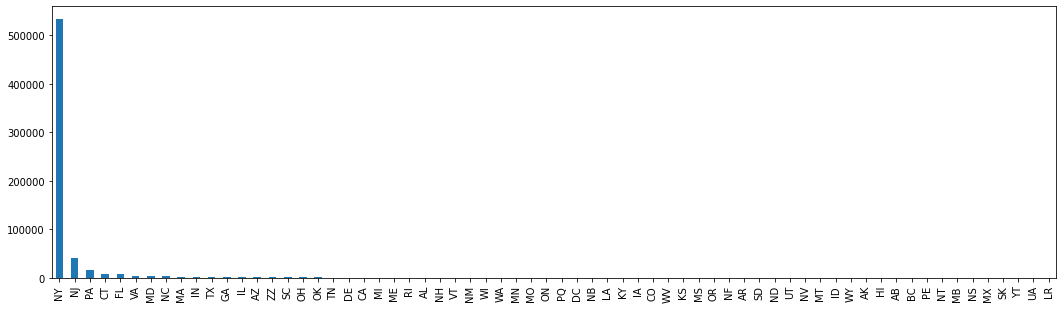

In [50]:
plt.rcParams["figure.figsize"] = (18,5)
data['STATE_REGISTRATION'].value_counts().plot(kind ='bar')
# Majority of accidents happened by the vehicle within 'NY'-New York and on the second place is 'NJ'-New Jersey' which is a nearby state.

#**Pre processing for DRIVER_LICENSE_JURISDICTION Column**

In [51]:
data['DRIVER_LICENSE_JURISDICTION'].unique()

array(['NY', 'PA', 'NC', nan, 'NJ', 'VA', 'MN', 'ON', 'AL', 'FL', 'MX',
       'MA', 'MD', 'TX', 'CT', 'ZZZ', 'IL', 'TN', 'NB', 'CA', 'PQ', 'WA',
       'AK', 'RI', 'OH', 'MO', 'MI', 'KS', 'GA', 'NH', 'MS', 'AZ', 'SC',
       'ID', 'CO', 'DE', 'VT', 'IN', 'OK', 'NF', 'DC', 'MT', 'NM', 'AB',
       'ME', 'IA', 'ND', 'LA', 'OR', 'NB1', 'NV', 'WI', 'HI', 'WV', 'UT',
       'KY', 'SD', 'BC', 'AR', 'WY', 'YT', 'NS', 'PE', 'PR', 'MB', 'SK',
       'NT', 'A,NEJADE', 'NE', "PA'"], dtype=object)

In [52]:
data[data['DRIVER_LICENSE_JURISDICTION'] =='A,NEJADE']
# This is an error there is not state with such a license jurisdiction.
#(647732, 26)
data.drop(data[data['DRIVER_LICENSE_JURISDICTION'] == 'A,NEJADE'].index, inplace = True)

In [53]:
data.shape
# The error row is removed.

(647731, 26)

#**Pre processing for DRIVER_LICENSE_STATUS Column**

In [54]:
data['DRIVER_LICENSE_STATUS'].value_counts()
# 113984 missing values are also present in this data. But still accidents are mostly created by the Licensed people. That is around 80% of accidents.
# We can handle the missing values later as it will remove a major portion of the valuable data.

Licensed      523716
Unlicensed      6772
Permit          3259
Name: DRIVER_LICENSE_STATUS, dtype: int64

#**Pre processing for VEHICLE_MAKE Column**

In [55]:
data['VEHICLE_MAKE'].value_counts()

TOYT -CAR/SUV           115565
HOND -CAR/SUV            81443
NISS -CAR/SUV            68071
FORD -CAR/SUV            53675
CHEV -CAR/SUV            31045
                         ...  
fdny truck                   1
Winnebago                    1
ALEXANDER DENNIS             1
VESPA (GTS300IE)             1
SEAGRAVE TOWERLADDER         1
Name: VEHICLE_MAKE, Length: 3779, dtype: int64

In [56]:
import re
def vechile_make_extractor(name):
  if re.search('\-.*', name): 
    p = re.search('\-.*', name).start() 
    return name[:p-1] # We want the space to be removed otherwise 'GMC ' and 'GMC' will be different categories.
  else:
    return name
data['VEHICLE_MAKE'] = data['VEHICLE_MAKE'].apply(vechile_make_extractor)

In [57]:
data['VEHICLE_MAKE'].unique()

array(['TOYT', 'FRH', 'BMW', ..., 'BMW/ 535I XDRIV', 'DONG',
       'SEAGRAVE TOWERLADDER'], dtype=object)

In [58]:
a = list(data['VEHICLE_MAKE'].unique())
b = []
for i in a:
  try:
    if i[0] == 'C' or i[0] == 'c': # checked with the first letter of the vehicle make label.
      b.append(i)
  except:
    pass
print(b)

['CHEV', 'CHRY', 'CADI', 'COLLI', 'CHE', 'CATER', 'CHEVROLET', 'COOP', 'CAT', 'colli', 'CHEVY', 'CORBE SAV', 'COMM TRL', 'Colli', 'CHEVROLET EXPRESS', 'CHEVROLET VAN', 'COLLING BUSES', 'COACH', 'chevy', 'chevr', 'COLLINS BUS', 'cub cadet', 'CASE', 'CANA', 'CATE', 'cobre', 'CA', 'CL/CA', 'CHEVROLET EXPRESS YELLOW SUBURBAN', 'CITY BUS', 'courier', 'CATERPILLAR', 'Coli', 'CHRYSLER', 'CAMPA', 'CHEC', 'COMMERCIAL TRUCK', 'CUB CADET', 'CHANGZH64 YAMASAKI', 'CARGO', 'CHEVR', 'cimc', 'Chevrolet', 'Cater', 'ceagrave', 'COURIER', 'cat', 'CHERVOLET', 'cox', 'CAM', 'COLLINS', 'crgm', 'CHAMPION', 'CHEVROLET EXP', 'Chevy', 'Cub cadet', 'CORN PRO TRAILER', 'CFMOT', 'COMMERCIAL CARRIERS MFG INC', 'CIMC', 'Cimc', 'corbe', 'Collins', 'CHEVY EXPRESS', 'CON ED EMERGENCY TRUCK', 'cater', 'COR', 'cottag', 'chevrolet', 'CAT325 EXCAVATER', 'CAMION', 'cak', 'curra', 'cam', 'Corbe', 'CUTAW', 'COLLI BUS', 'currahee', 'ca/am', 'COM', 'canam', 'CTRA TRAILER', 'CITR', 'collins', 'Courier', 'Coll', 'carr', 'CARR', '

##**Different ways in which the vehicle make is represented within the VEHICLE_MAKE column**

In [59]:
"""
'TOYT' = 'TOYOTA', 'toyota', 'TOY', 'TOYOTA FORKLIFT', 'TOYOTA PRIUS'
'SUBA' =  'SUBAR','subaru'
'CADI' = 'Cadillac','CADIL', 'cadil', 
'GMC' = 'GM', 'gmc', 'GMC9', 'Gmc', 'GMC 999', 'GMC TANK',
'DODGE' = 'DODG','DOGE', 'DOD', 'dodge', 'DONGE', 'Dodge RAM', 
'SUBN' = ''TRANS SUBN', 'subn', 'SUBN', 'suburban'
'DUCATI' = 'DUCA', 'ducati',  
'TESLA' = 'TESL'
'ISUZU'= 'ISU', 'IS', 'IZUZU', 'isu', 'isuzu', 'IZU', 
'MERZ' = 'MERCEDEZ BENZ', 'MER', 'mercedes benz', 'MERCEDES BENZ', 'Mercedes Benz', 'MERCE','MERCEDES', 'MERCDES BENZ', 'me/benz', 
'ORION' = 'orion', 'Orio', 'Orion', 'OPION', 'ORIN', 'ORIO', 'ORION/OMNIBUS', 'ORION NONTRANSFERABLE', 'ORION ONTARIO BUS', 'orion mta bus', 'ORION BUS', 
'FREIGHTLINER' = 'freightliner', 'freig', 'frht', 'FRH', 'FREIGHT', 'FREIG', 'FREIGHLINER', 'freight', 'Frht', 'frtl', 'FREIGHTLINER CORP. 999', 'FLINER', 'FREI',
                 'FREIGHT LINER', 'Freig', 'Freightliner', 'freight liner', 'FRIEGHT', 'FRHT', 'FRIG', 'FRIEG', 'freighliner', 'freight liner corp', 'FREIGHTLINER CORP',
                 'freightline', 'FRIEGHTLINER CORP', 'frgh', 'Freigh', 'FRGH', 'Frt', 'frieghtliner corp', 'FRIGHT', 'FREIGHTLINE', 'frt', 'FRTL', 'FRIEGHT LINER', 'Frei',
                 'FR/LT', 'Freightleiner', 'FREIG TRUCK', 'freightlnr', 'friegthliner', 'freigh', 'freightliner truck m2 106','Fr/Li',  'FRIGHTLINER', 'Freightliner truck',
                 'frieght', 'frieghtliner', 'Freightliner Bus', 'FREIGHTLINER CORP. 999, 'Freightline', 'FREIGHTLINER VAN TRUCK', 'Freightliner Corp', 'Fright liner',
                 'FREIGHTLINER CORP.', 'freihtliner', 'freightliner corp', 'FREIGHTLINER CORP. 999, GREEN DUMP TRUCK'
'AMBULANCE' = 'ambulance', 'Ambulance','ford ambulance', 'AMBU WH/RD', 'FORD AMBULANCE', 'Fdny Ems ambulance', 'AMBU', 'Ford AMBU', 'FDNY ambulance', 'FDNY AMBULANCE', 'AMB'
'YAMAHA' = 'YAMA', 'YAMAHA', 'yamah', 'Yamaha'
'NE/FL' = 'ne/fl', 'NE /FL', 'NE/F', 'newfl', 'NEWFL', 'NFLY', 'new flyer', 'newflyer', 'Newfl', 'Ne/fl', 'NEWFLYER', 'Ne fl', 'NE FL', 'NEW FLYER (OMNIBUS)', 'NE\\FL',
          'NEW FLYER, WHITE BLUE BUS(OMNIBUS)', 
'INTL' = 'intl'
'REVEL' = 'Revel', 'revel', 'REVEL LANDEY'
'KIA' = 'Kia',
'RAM' = 'ram', 'Ram', 'RAM 550','RAMS'
'HUMMER' = 'HUMM',
'UNKNOWN' = 'UNKOWN', 'unk', 'Unknown', '-CAR/SU', 'UKN', 'unk.', 'unknown', 'UNKN', 
'MACK' = 'mack', 'Mack', 'Mac', 'MACK DUMP TRUCK', 'MACK TRUCKS', 'mack truck', 'MIC', 'mac', 'MACK DUMP', 'Mack Truck', 'MACK TRUCK 999', 'mack trucks', 'MACK TRUCK',
         'mack dumptruck', 'MACK TRUCKS, INC.', 'Mac trailer', 
'HYUNDAI' = 'HYU', 'HYUN', 'Hyundai', 
'HINO' = 'hino', 'Hino', 'Hin', 'HINDO', 'HINO FLAT', 'HINO ND', 'HINO 999', 'HINO TRUCK', 
"""

"\n'TOYT' = 'TOYOTA', 'toyota', 'TOY', 'TOYOTA FORKLIFT', 'TOYOTA PRIUS'\n'SUBA' =  'SUBAR','subaru'\n'CADI' = 'Cadillac','CADIL', 'cadil', \n'GMC' = 'GM', 'gmc', 'GMC9', 'Gmc', 'GMC 999', 'GMC TANK',\n'DODGE' = 'DODG','DOGE', 'DOD', 'dodge', 'DONGE', 'Dodge RAM', \n'SUBN' = ''TRANS SUBN', 'subn', 'SUBN', 'suburban'\n'DUCATI' = 'DUCA', 'ducati',  \n'TESLA' = 'TESL'\n'ISUZU'= 'ISU', 'IS', 'IZUZU', 'isu', 'isuzu', 'IZU', \n'MERZ' = 'MERCEDEZ BENZ', 'MER', 'mercedes benz', 'MERCEDES BENZ', 'Mercedes Benz', 'MERCE','MERCEDES', 'MERCDES BENZ', 'me/benz', \n'ORION' = 'orion', 'Orio', 'Orion', 'OPION', 'ORIN', 'ORIO', 'ORION/OMNIBUS', 'ORION NONTRANSFERABLE', 'ORION ONTARIO BUS', 'orion mta bus', 'ORION BUS', \n'FREIGHTLINER' = 'freightliner', 'freig', 'frht', 'FRH', 'FREIGHT', 'FREIG', 'FREIGHLINER', 'freight', 'Frht', 'frtl', 'FREIGHTLINER CORP. 999', 'FLINER', 'FREI',\n                 'FREIGHT LINER', 'Freig', 'Freightliner', 'freight liner', 'FRIEGHT', 'FRHT', 'FRIG', 'FRIEG', 'freighlin

##Vehicle make is represented by different name for the same maker. Inorder to properly analyze the data we have to change all the similar values to their group. We will be replacing the errors of the vehicle make of TOYT, CADI, SUBA, GMC to their original forms for analysis.

In [60]:
# Correcting the mistakes of VEHICLE_MAKE -- TOYT
data['VEHICLE_MAKE'] = data['VEHICLE_MAKE'].replace(['TOYOTA', 'toyota', 'TOY', 'TOYOTA FORKLIFT', 'TOYOTA PRIUS'],'TOYT')

In [61]:
# Correcting the mistakes of VEHICLE_MAKE -- SUBA and HYUNDAI
data['VEHICLE_MAKE'] = data['VEHICLE_MAKE'].replace(['SUBAR','subaru', 'HYU', 'HYUN', 'Hyundai'],['SUBA','SUBA', 'HYUNDAI', 'HYUNDAI', 'HYUNDAI'])

In [62]:
# Correcting the mistakes of VEHICLE_MAKE -- CADI and DODGE
data['VEHICLE_MAKE'] = data['VEHICLE_MAKE'].replace(['Cadillac','CADIL', 'cadil', 'DODG','DOGE', 'DOD', 'dodge', 'DONGE', 'Dodge RAM'],['CADI', 'CADI', 'CADI', 'DODGE','DODGE','DODGE','DODGE','DODGE','DODGE'])

In [63]:
# Correcting the mistakes of VEHICLE_MAKE -- GMC
data['VEHICLE_MAKE'] = data['VEHICLE_MAKE'].replace(['GM', 'gmc', 'GMC9', 'Gmc', 'GMC 999', 'GMC TANK'],'GMC')

In [64]:
data['VEHICLE_MAKE'].value_counts()
# We will also be correcting the mistakes of HONDA, NISSAN, FORD and CHEVROLET too as majority of the accidents happened by these vehicles.

TOYT                      115668
HOND                       81999
NISS                       68071
FORD                       54357
CHEV                       31072
                           ...  
Gdan                           1
harley davison                 1
REGINAL BUS OPERATIONS         1
fdny truck                     1
SEAGRAVE TOWERLADDER           1
Name: VEHICLE_MAKE, Length: 3643, dtype: int64

##Different Ways in which the VEHICLE MAKE 'HONDA', 'NISSAN', 'FORD', 'CHEVROLET' are represented in the data.

In [65]:
"""
'HONDA' = 'HOND', 'honda', 'Honda 250', 'Honda'
'NISSAN'= 'NISS','NIS', 'NISSAN','NISSIAN ZX6K', 
          'Nissan', 'UD / NISSAN', 'NISSAN DIESEL MOTOR',
          'NISSIAN','NISSAN DIESEL MOTOR VAN','Nissan Diesal Motor',
          'NISSAM N 20','nissan', 'NISSAN DIESEL MOTOR COMPANY','nissa'
'FORD' =  'FOR', 'Ford', 'ford', 'FORD F450', 'FORD CEMENT TRUCK',
          'FORD EC2', 'FORD XXX', 'FORD 550', 'FORD E350', 'FORD WAGON', 
          'FORD UTILITY','FORD SUBN','ford econoline ambulance','FoRD',
          'FORD/AMBULANCE','ford van','ford transit', 'Ford ambulance', 
          'Ford Transit', 'FORD RANGER', 'FORD DUMP TRUCK',
          'FORD AMBU', 'Ford van', 'ford f550 fdny nys ambulance', 
          'Ford dump truck', 'FORD WHITE VAN','FORD TCN', 'FORD ECONOLINE',
          'Ford Taxi', 'FORD USPS2TON', 'Ford FDNY Ambulance', 'FORDA', 
          'FORD / TRANSIT CONNECT', 'Ford EC3', 'FPRD', 'FORDAMBULANCE', 'FORD EC2'
'CHEVROLET' = 'CHEV', 'CHE', 'CHEVY', 'CHEVROLET EXPRESS', 'CHEVROLET VAN', 'chevy', 
              'chevr', 'CHEVROLET EXPRESS YELLOW SUBURBAN', 'CHEVR', 'Chevrolet',
              'CHERVOLET', 'CHEVROLET EXP', 'CHEVY EXPRESS', 'chevrolet',
              'chevrolet commercial van', 'cheverleot', 'CHEVEROLET', 'chevrolet van', 
              'CHEVY VAN', 'Chevolet', 'CHEV. GULF', 'CHEVROVELT', 'Chevr bus', 'CHEVY SILVERADO', 
              'chevy express', 'Chevy express', 'cvevrolet', 'CHEVROLET AVALACHE', 'CHEVORLET', 'Chevorlet' 
"""

"\n'HONDA' = 'HOND', 'honda', 'Honda 250', 'Honda'\n'NISSAN'= 'NISS','NIS', 'NISSAN','NISSIAN ZX6K', \n          'Nissan', 'UD / NISSAN', 'NISSAN DIESEL MOTOR',\n          'NISSIAN','NISSAN DIESEL MOTOR VAN','Nissan Diesal Motor',\n          'NISSAM N 20','nissan', 'NISSAN DIESEL MOTOR COMPANY','nissa'\n'FORD' =  'FOR', 'Ford', 'ford', 'FORD F450', 'FORD CEMENT TRUCK',\n          'FORD EC2', 'FORD XXX', 'FORD 550', 'FORD E350', 'FORD WAGON', \n          'FORD UTILITY','FORD SUBN','ford econoline ambulance','FoRD',\n          'FORD/AMBULANCE','ford van','ford transit', 'Ford ambulance', \n          'Ford Transit', 'FORD RANGER', 'FORD DUMP TRUCK',\n          'FORD AMBU', 'Ford van', 'ford f550 fdny nys ambulance', \n          'Ford dump truck', 'FORD WHITE VAN','FORD TCN', 'FORD ECONOLINE',\n          'Ford Taxi', 'FORD USPS2TON', 'Ford FDNY Ambulance', 'FORDA', \n          'FORD / TRANSIT CONNECT', 'Ford EC3', 'FPRD', 'FORDAMBULANCE', 'FORD EC2'\n'CHEVROLET' = 'CHEV', 'CHE', 'CHEVY', '

In [66]:
#Replacing the errors for HONDA
data['VEHICLE_MAKE'] = data['VEHICLE_MAKE'].replace(['HOND', 'honda', 'Honda 250', 'Honda'],'HONDA')


In [67]:
#Replacing the errors for NISSAN
data['VEHICLE_MAKE'] = data['VEHICLE_MAKE'].replace(['NISS','NIS', 'NISSAN','NISSIAN ZX6K', 
                                                     'Nissan', 'UD / NISSAN', 'NISSAN DIESEL MOTOR',
                                                     'NISSIAN','NISSAN DIESEL MOTOR VAN','Nissan Diesal Motor',
                                                     'NISSAM N 20','nissan', 'NISSAN DIESEL MOTOR COMPANY','nissa'],'NISSAN')

In [68]:
#Replacing the errors for FORD
data['VEHICLE_MAKE'] = data['VEHICLE_MAKE'].replace(['FOR', 'Ford', 'ford', 'FORD F450', 'FORD CEMENT TRUCK',
                                                     'FORD EC2', 'FORD XXX', 'FORD 550', 'FORD E350', 'FORD WAGON', 
                                                     'FORD UTILITY','FORD SUBN','ford econoline ambulance','FoRD',
                                                     'FORD/AMBULANCE','ford van','ford transit', 'Ford ambulance', 
                                                     'Ford Transit', 'FORD RANGER', 'FORD DUMP TRUCK',
                                                     'FORD AMBU', 'Ford van', 'ford f550 fdny nys ambulance', 
                                                     'Ford dump truck', 'FORD WHITE VAN','FORD TCN', 'FORD ECONOLINE',
                                                     'Ford Taxi', 'FORD USPS2TON', 'Ford FDNY Ambulance', 'FORDA', 
                                                     'FORD / TRANSIT CONNECT', 'Ford EC3', 'FPRD', 'FORDAMBULANCE', 'FORD EC2'],'FORD')

In [69]:
#Replacing the errors for CHEVROLET
data['VEHICLE_MAKE'] = data['VEHICLE_MAKE'].replace(['CHEV', 'CHE', 'CHEVY', 'CHEVROLET EXPRESS', 'CHEVROLET VAN', 'chevy', 
                                                     'chevr', 'CHEVROLET EXPRESS YELLOW SUBURBAN', 'CHEVR', 'Chevrolet',
                                                     'CHERVOLET', 'CHEVROLET EXP', 'CHEVY EXPRESS', 'chevrolet','chevrolet commercial van', 
                                                     'cheverleot', 'CHEVEROLET', 'chevrolet van', 'CHEVY VAN', 'Chevolet', 'CHEV. GULF', 
                                                     'CHEVROVELT', 'Chevr bus', 'CHEVY SILVERADO', 'chevy express', 'Chevy express', 'cvevrolet', 
                                                     'CHEVROLET AVALACHE', 'CHEVORLET', 'Chevorlet'],'CHEVROLET')

In [70]:
data['VEHICLE_MAKE'].value_counts()
# We can see the difference in each of Vehicle make frequency.

TOYT                      115668
HONDA                      82025
NISSAN                     68321
FORD                       61437
CHEVROLET                  32690
                           ...  
M2106                          1
Gdan                           1
harley davison                 1
REGINAL BUS OPERATIONS         1
SEAGRAVE TOWERLADDER           1
Name: VEHICLE_MAKE, Length: 3560, dtype: int64

#**Pre processing for VEHICLE_TYPE Column**

##Several cleaning is to be done for Vehicle type, since same Vehicle type is represented in different ways.

In [71]:
data['VEHICLE_TYPE'].value_counts()
# There are huge no of different values we need to categorize this into 10 different types.

Sedan                                  296310
Station Wagon/Sport Utility Vehicle    247628
Taxi                                    29050
Pick-up Truck                           20214
Box Truck                               14148
                                        ...  
35 FT                                       1
TOWIN                                       1
VERIZ                                       1
posta                                       1
ROAD SWEEE                                  1
Name: VEHICLE_TYPE, Length: 741, dtype: int64

In [72]:
data['VEHICLE_TYPE'].unique()

array(['Station Wagon/Sport Utility Vehicle', 'Bus', 'Sedan',
       '4 dr sedan', 'Box Truck', 'Taxi', 'School Bus', 'Pick-up Truck',
       'Motorcycle', 'Flat Bed', 'Van', 'Dump', 'Convertible',
       'Tractor Truck Diesel', 'Carry All', 'Refrigerated Van', 'PSH',
       'COM', 'AMBULANCE', 'Garbage or Refuse', 'trail',
       'Tow Truck / Wrecker', 'BACKH', 'Armored Truck', 'PK', 'Motorbike',
       'Ambulance', 'E-Scooter', 'DUMP', 'TRAC', 'Beverage Truck',
       'FIRETRUCK', 'VAN/TRANSI', 'Moped', 'Tractor Truck Gasoline',
       'Multi-Wheeled Vehicle', 'E-Bike', 'Tanker', 'Motorscooter',
       'Concrete Mixer', 'TRAILOR', 'CAT', 'motorcycle', 'TRAILER',
       'ICE CREAM', 'CARGO VAN', 'Minicycle', 'Lift Boom', 'USPS',
       'gator', 'Snow Plow', 'TRLR', 'van', 'FRE T', 'UTILI', 'MAC T',
       'TRAIL', 'AMBUL', 'E-Bik', 'EMS B', 'SPRIN', 'FEDER', 'Trailer',
       'Crane', 'E-Sco', 'Chassis Cab', 'FORD', 'Flat Rack', '3-Door',
       'FIRE', 'LIMO', 'Subn', 'SCHOO', 'bus',

In [73]:
"""
SEDAN = '4 dr sedan', 'Sedan', 'CHEVROLET', 'ORION', 'Chevy', 'E450', 'sedan', '2 dr sedan', 'Sedan','4 dr sedan'
PASSENGER VEHICLE = 'NYC AMBULA', 'ambulette', 'SELF INSUR', 'Fdny ambul', 'pc', 'HORSE CARR', 'ambulence', 'H1', 'amb', 'NYS AMBULA', 'YELLOWPOWE', 
                    'FDNY EMT', 'GOV', 'R/V', 'RV/VAN', 'AMBULETTE', 'SUBURBAN', 'White ambu', 'passenger', 'cross', 'PALFINGER', 'LIGHT TRAI', 'FDNY Ambul', 'Pas',
                    'government', 'suburban', 'SUBN/', 'PASS', 'AMbul', 'limo', 'COMER', 'Amb', 'ambu', 'CHEVY EXPR', 'CHEVY', 'LIMO', 'Subn', 'Open Body', 'pas', 
                    'White', 'AMB', 'ROADS', 'RV', 'ambul', 'Motorized Home', 'SUBUR', 'SELF', 'PASSE', 'armor', 'ambulance', 'Ambul', 'SMART', 'subn', 'FDNY AMBUL', 
                    'MOBILE', 'WHITE', 'E350', 'FDNY Engin', 'E250', 'AMBULENCE, 'COMMERCIAL', 'nyc f', 'AMBUL', 'AMBU', 'FORD', 'AMBULANCE','Ambulance', 'Ambu'
SPORT UTILITY VEHICLE = 'Sport Utility Vehicle', 'STATION WAGON', 'Sport Utility Vehicle', 'SPORT UTILITY', 'Station Wagon', 'ESCOVATOR', 'Tree cutte', 'camper tra',
                        'firetruck', 'tow truck', 'ROAD SWEEE', 'GLP050VXEV', 'PC', 'MECHANICAL', 'HRSE', 'f-250', 'Pick up', 'SUBN WHI', 'pay loader',
                        'HRSE', 'LIT DIRECT', 'T880', 'GOLF CART', 'RDS', 'TL', 'FREIG DELV', 'util', 'G com', 'Fire Engin', 'TRACTOR TR', 'POWER SHOV', 
                        'BULDOZER', 'FEDERAL EX', 'Utility.', 'RD BLDNG M', 'TANK WH', 'Wagon', 'Forklift t', 'Station Wagon/Sport Utility Vehicle', 
                        'FDNY FIRET', 'ESCAVATOR', 'FIRE ENGIN', 'FORK LIFT', 'self insur', 'excavator', 'SWEEPER', 'PICK-UP TR', 'tow trk', 'OMT', 'pickup',
                        'TTRAILER', 'ESU RESCUE', 'tractor tr', 'SEMI TRAIL', 'Piggy back', 'Road Sweep', 'TRANSIT VA', 'PICK RD', 'access a r', 'Horse Trai',
                        'US POSTAL', 'FDNY FIRE', 'FDNY LADDE', 'D/V WB', 'constructi', 'TOW TRUCK', 'UTIL WH', 'Golf Cart', 'JOHN DEERE', 'Tractor tr', 'GENAMBUL',
                        'street cle','Firetruck', 'power shov', 'Tow truck', 'Light trai', 'Tractor Tr', 'TR-Trailer', 'historical','PICKUP TRU', 'sanitation', 
                        'PICKUP', 'STREET SWE', 'Work Van', 'uhaul truc', 'AMAZON SPR','Pumper', 'SANTI', 'EMS', 'D', 'PU', 'Attac', 'picku', 
                        'BROWN', 'TCR', 'wheel', 'ECONO', 'L1', 'spec-', 'TRIM', 'EMT', 'GAS T', '2 HOR', 'escavator', 'SLINGSHOT', 'SPECIAL PU', 'unk', 'TRACTOR', 
                        'PICK UP', 'FORKLIFT', 'Stree', 'Work', 'SKATE', 'POSTA', 'PICK-', 'fork', 'APPOR', 'Enclosed Body - Nonremovable Enclosure', 'NYCHA', 'SANITATION', 
                        'DOLLY', 'POLIC', 'SC', 'Trac', 'ken', 'CO', 'HORSE', 'fire', 'FRHT', 'crane', 'WINNE', 'NV150', 'REP', 'Motor Home', 'LTRL', 'Backh', 
                        'sanit', 'acces', 'CATER', 'NTTRL', 'st', 'GATOR', 'OIL T', 'BLACK', 'VAV', 'rd/s', 'DOT T', 'Small', 'Liebh', 'speci', 'dp', 'CAMPE',
                        'c7c', 'const', 'Other', 'COUPE', 'S/SP', 'delv', 'Log', 'BUCKE', 'horse', 'Tractor', 'PEDIC', 'dsny', 'SELF-', 'rep', 'PSD', 'CONT', 'movin', 
                        'BROOM', 'cate', 'PCH', 'CEMEN', 'UTLL', 'SWEEP', 'conta', 'mecha', 'HARVE', 'POST', 'Const', 'RESCU', 'trac', 'EXCAV', 'trailer', 'HAUL FOR H', 
                        'SPC', 'COM.', 'cater', 'Well Driller', 'Pickup with mounted Camper','ND', 'work', '2015', 'J1', 'NV CA', 'FORKL', 'conv', 'Comix', 'COMM', 'Utili', 
                        'E - B', '52? t', 'SAFET', '12 Pa', 'LMB', 'LTR', 'VMS T', 'SE', 'Elect', 'NAVIG', 'BS', 'TRL', 'excav', 'TIR', 'stree', 'trailor', 'CONST', 'MAIL', 
                        'TRANS', 'FLAT', 'dump', "GOV'T", 'scava', 'santa', 'OML/', 'FORK', 'WAGON', 'ROAD', 'Trl', 'Glass Rack', 'com', 'ARMOR', 'EXPRE', 'forklift'', 
                        'BOBCAT FOR', 'E REVEL SC', 'tow', 'Comm', 'COURI', 'Track', '72000', 'pick', 'trl', 'BOOM', 'OMNIB', 'LIEBH', 'case', 'ELECT', 'TRT', 'US PO', 
                        'fire truck', 'JLG L', 'Sanit', 'COMMU', 'wagon', 'EMRGN', 'E COM', 'BACK', 'FUEL', 'A', 'usps', 'Bucke', 'Rescu', 'ENCLO', 'FED E', 'TKP', 'prks', 
                        'Pick', 'Sprin', 'F650', 'WORK', 'SEA', 'CITY', 'comm.', 'axo', 'n\\a', 'e com', 'U-Hau', 'RAM', '16M', 'CMS-T', 'rv', 'G COM', 'PKUP', 'Wh Ford co', 
                        'commercial', 'ASTRO', 'City', 'MOVIN', 'ROAD SWEEP', 'TKTR', 'Hrse', 'te', 'tk', 'St', 'CHURC', 'CONCR', 'Tr', 'TRA/R', 'APURP', 'city', 'Mail', 
                        'SWT', 'posta', 'TOWIN', 'DSNY', 'Station Wagon/Sport Utility Vehicle', 'Convertible', 'Tractor Truck Diesel', 'Carry All', 'PSH', 'COM', 
                        'Concrete Mixer', 'TRAILOR', 'TRAILER', 'Lift Boom', 'USPS', 'gator', 'Snow Plow', 'TRLR', 'van', 'TRAIL', 'EMS B', 'SPRIN', 'FEDER', 'Trailer', 
                        'Crane', 'Flat Rack', '3-Door', 'FIRE', 'Tow Truck', 'TRK', 'tr', 'HINO', 'CASE', 'JOHN', 'TRACK', 'TOW T', 'REFG', 'Grain', 'P/SH', 'FIRE TRUCK', 
                        'IP', 'Hopper', 'tour', 'TRACT', 'UTIL', 'Jeep', 'Forkl', 'DELIV', 'COMME', 'SANIT', 'NYPD', 'Trail', 'UT', 'power', 'US Po', 'NYC F', 'Tow t', 
                        'STREE', 'Tow', 'BULLD', 'Train', 'LIMOU', 'PICKU', 'PAS', 'POWER', 'STAK', 'NYS A', 'Livestock Rack', 'hrse', 'TOWER', 'Fire', 'front', 'OMS', 
                        '\x7fomm', 'C1', 'Tow T', '38AB-', 'Deliv', 'Pallet', 'tract', 'Comme', 'comme', 'FRONT', 'ICE C', 'Refri', 'UHAUL', 'D1', 'WORKH', 'tow t', 
                        'Pedicab', 'Fire Truck', 'TOWTR', 'CRANE', 'utili', 'SKID', 'OMR', 'BOB C', 'track', 'Pickup', 'comm', 'EMS A', 'back', 'CMIX', 'Lunch Wagon'

UNKNOWN ='Unkno','UNKNO', 'UNKN', 'other', 'UNK'
  
TAXI = 'TAXI', 'Taxi', 'yellow cab', 'Chassis Cab','YELLO', 'Taxi'

VAN = 'WORK VAN', 'Cargo Van', 'ford econo', 'sprinter v', 'SPINTER VA', 'Ford Van', 'SPRINTER V', 'DELIVERY V','LCOMM', 'DEPT VAN #', 'postal ser', 'COURIER',
      'ford van', 'TRUCK VAN', 'Postal Veh', 'DELVI', 'van c', 'MOVING VAN', 'Vanette', , 'VAN T', 'DELV', 'Van Camper', '3 WHE', 'Delv', 'VAN A', 'sprin', 'RD/S', 
      'deliv', 'SUV', 'van t', 'VAN/T', 'van a', 'Van', 'ICE CREAM', 'CARGO VAN', 'VAN/TRANSI', 'Van T', 'Refrigerated Van', 'RMP V','Van ('

BIKE = 'Bike', 'E-scooter', 'E-BIKE', 'Dirt Bike', 'VESPA', 'E-SCO', 'BK', 'vespa', 'elect', 'road', 'Minibike', 'moped', 'mopd', 'Motorscooter'
       'E BIK', 'E-BIK', 'E-Bike', 'E-Bik', 'E-Sco', 'MOPED', 'SCOOT', 'E-SCOOTER', 'Moped', 'E-Scooter', 'Motorbike','Bike', 'bmw moped',
       'MOPD', 'E SCO', 'Scoot'

BUS = 'Bus', 'MTA Bus', 'Short Bus', 'TOUR BUS', 'MTA', 'School bus', 'school bus', 'SCHOOL BUS', 'City MTA b', 'BUs', 'TRANSPORT', 'SCHOOLBUS', 'BLU BUS',
      'MTA BUS', 'NYC BUS', 'nyc b', 'MTA B', 'mta b', 'Schoo' 'Bus', 'School Bus', 'SCHOO', 'bus', 'schoo', 'Road', 'Mta'

TRUCK = 'Pick-up Truck', 'Truck', 'DELIVERY T', 'UTILITY TR', 'FDNY truck', 'BOX Truck','Cargo Truc', 'DOT TRUCK', 'HINO TANK', 'flatbed', 'Mack', 'FLATBED', '197209', 
        'armored tr', 'FOOD TRUCK', 'postal tru', 'DUMP TRUCK', 'POSTAL TRU', 'FD TRUCK', 'Livery Omn', 'NYC DOT', 'FDNY EMS V',
        'Dump truck', 'FREIGHT TR', 'street swe', 'UTILITY', 'LCOM', 'USPS TRUCK', 'food truck', '4dsd', 'FLATBED TR', 'dilevery t','INTERNATIO', 
        'TRUCK FLAT', 'dump truck', 'FDNY Truck', 'Front-Load','FRIEGHTLIN', 'FREIGHT FL','bed', 'FDNY TRUCK', 'CAT P', 'GARBAGE TR', 'FDNY EMS', 
        '18 WHEELER','Bucket Tru', 'USPS2', 'U-TRU', 'ARMY', 'MARK', 'FREIGHTLIN', 'BoxTr', 'CARGO', 'CAT32', 'Garba', 'TANKE', 'GARAB', 'FIRET', 
        'TANK','box t','dumps','box', 'BOX T', 'INTER', 'BOX TRUCK', 'tank', 'Fd fi', 'Freight''FLATB', 'truck', 'Box t','FDNY ENGIN', 'Freig', 
        'WASTE', 'Flat', 'Enclosed Body - Removable Enclosure', 'flatb', 'FLAT/', 'FRIEG','Firet',, 'COMMERICAL', 'Cmix', 'Pick Truck', 'NYC D', 
        'g spc', 'TOYOT', 'trlr', 'backh', 'firet','NYC', 'Tract', 'Stake or Rack', 'Bulk Agriculture', 'fdny', '35 FT', 'VERIZ', 'TRUCK', 'frieg', 
        'FEDEX', 'GLBEN', 'mail', 'mack', 'GARBA', 'FDNY', 'Box T', '18 WEELER', 'box truck', 'Box Truck', 'Box Truck',
        'FREIG', 'MAIL TRUCK', 'UPS TRUCK', 'Food', 'BOX', 'Truck', 'Flat Bed', 'FLAT BED', 'MACK', 'CAT.', 'Garbage or Refuse', 'trail', 'Tow Truck / Wrecker', 
        'BACKH', 'Armored Truck', 'PK', 'DUMP', 'TRAC', 'Beverage Truck', 'FIRETRUCK', 'Tractor Truck Gasoline', 'Dump',
        'Multi-Wheeled Vehicle', 'FRE T', 'UTILI', 'MAC T', 'DUMPT', 'garba', 'Tanker', 'Pick-up Truck'

MOTORCYCLE = 'Motorcycle', 'JETSKI', 'semi-trail', 'SEMI TRAIL', 'SEMI-','moter', 'semi', 'Semi-', 'Motorcycle', 'motor', 'MOTOR', 'motorcycle', 'SEMI'
BICYCLE  = 'Bicycle', 'BTM', 'Minicycle'
"""

'\nSEDAN = \'4 dr sedan\', \'Sedan\', \'CHEVROLET\', \'ORION\', \'Chevy\', \'E450\', \'sedan\', \'2 dr sedan\', \'Sedan\',\'4 dr sedan\'\nPASSENGER VEHICLE = \'NYC AMBULA\', \'ambulette\', \'SELF INSUR\', \'Fdny ambul\', \'pc\', \'HORSE CARR\', \'ambulence\', \'H1\', \'amb\', \'NYS AMBULA\', \'YELLOWPOWE\', \n                    \'FDNY EMT\', \'GOV\', \'R/V\', \'RV/VAN\', \'AMBULETTE\', \'SUBURBAN\', \'White ambu\', \'passenger\', \'cross\', \'PALFINGER\', \'LIGHT TRAI\', \'FDNY Ambul\', \'Pas\',\n                    \'government\', \'suburban\', \'SUBN/\', \'PASS\', \'AMbul\', \'limo\', \'COMER\', \'Amb\', \'ambu\', \'CHEVY EXPR\', \'CHEVY\', \'LIMO\', \'Subn\', \'Open Body\', \'pas\', \n                    \'White\', \'AMB\', \'ROADS\', \'RV\', \'ambul\', \'Motorized Home\', \'SUBUR\', \'SELF\', \'PASSE\', \'armor\', \'ambulance\', \'Ambul\', \'SMART\', \'subn\', \'FDNY AMBUL\', \n                    \'MOBILE\', \'WHITE\', \'E350\', \'FDNY Engin\', \'E250\', \'AMBULENCE, \'COMMERCIAL

##Grouping the similar 'VEHICLE_TYPE' into a groups.

In [74]:
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].replace(['NYC AMBULA', 'ambulette', 'SELF INSUR', 'Fdny ambul', 'pc', 'HORSE CARR', 'ambulence', 'H1', 'amb', 'NYS AMBULA', 'YELLOWPOWE', 
                    'FDNY EMT', 'GOV', 'R/V', 'RV/VAN', 'AMBULETTE', 'SUBURBAN', 'White ambu', 'passenger', 'cross', 'PALFINGER', 'LIGHT TRAI', 'FDNY Ambul', 'Pas',
                    'government', 'suburban', 'SUBN/', 'PASS', 'AMbul', 'limo', 'COMER', 'Amb', 'ambu', 'CHEVY EXPR', 'CHEVY', 'LIMO', 'Subn', 'Open Body', 'pas', 
                    'White', 'AMB', 'ROADS', 'RV', 'ambul', 'Motorized Home', 'SUBUR', 'SELF', 'PASSE', 'armor', 'ambulance', 'Ambul', 'SMART', 'subn', 'FDNY AMBUL', 
                    'MOBILE', 'WHITE', 'E350', 'FDNY Engin', 'E250', 'AMBULENCE', 'NYC FD', 'COMMERCIAL', 'nyc f', 'AMBUL', 'AMBU', 'FORD', 'AMBULANCE','Ambulance', 'Ambu'],'PASSENGER VEHICLE')

In [75]:
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].replace(['Pick-up Truck', 'Truck', 'DELIVERY T', 'UTILITY TR', 'FDNY truck', 'BOX Truck','Cargo Truc', 'DOT TRUCK', 'HINO TANK', 'flatbed', 'Mack', 'FLATBED', '197209', 
        'armored tr', 'FOOD TRUCK', 'postal tru', 'DUMP TRUCK', 'POSTAL TRU', 'FD TRUCK', 'Livery Omn', 'NYC DOT', 'FDNY EMS V',
        'Dump truck', 'FREIGHT TR', 'street swe', 'UTILITY', 'LCOM', 'USPS TRUCK', 'food truck', '4dsd', 'FLATBED TR', 'dilevery t','INTERNATIO', 
        'TRUCK FLAT', 'dump truck', 'FDNY Truck', 'Front-Load','FRIEGHTLIN', 'FREIGHT FL','bed', 'FDNY TRUCK', 'CAT P', 'GARBAGE TR', 'FDNY EMS', 
        '18 WHEELER','Bucket Tru', 'USPS2', 'U-TRU', 'ARMY', 'MARK', 'FREIGHTLIN', 'BoxTr', 'CARGO', 'CAT32', 'Garba', 'TANKE', 'GARAB', 'FIRET', 
        'TANK','box t','dumps','box', 'BOX T', 'INTER', 'BOX TRUCK', 'tank', 'Fd fi', 'Freight''FLATB', 'truck', 'Box t','FDNY ENGIN', 'Freig', 
        'WASTE', 'Flat', 'Enclosed Body - Removable Enclosure', 'flatb', 'FLAT/', 'FRIEG','Firet', 'COMMERICAL', 'Cmix', 'Pick Truck', 'NYC D', 
        'g spc', 'TOYOT', 'trlr', 'backh', 'firet','NYC', 'Tract', 'Stake or Rack', 'Bulk Agriculture', 'fdny', '35 FT', 'VERIZ', 'TRUCK', 'frieg', 
        'FEDEX', 'GLBEN', 'mail', 'mack', 'GARBA', 'FDNY', 'Box T', '18 WEELER', 'box truck', 'Box Truck', 'Box Truck',
        'FREIG', 'MAIL TRUCK', 'UPS TRUCK', 'Food', 'BOX', 'Truck', 'Flat Bed', 'FLAT BED', 'MACK', 'CAT.', 'Garbage or Refuse', 'trail', 'Tow Truck / Wrecker', 
        'BACKH', 'Armored Truck', 'PK', 'DUMP', 'TRAC', 'Beverage Truck', 'FIRETRUCK', 'Tractor Truck Gasoline', 'Dump',
        'Multi-Wheeled Vehicle', 'FRE T', 'UTILI', 'MAC T', 'DUMPT', 'garba', 'Tanker', 'Pick-up Truck', 'FLATB', 'Freight', 'ORION', 'CAT', 'DELIVERY', 'delivery t', 'Delivery'],'TRUCK')

In [76]:
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].replace(['Bicycle', 'BTM', 'Minicycle'],'BICYCLE')

In [77]:
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].replace(['Motorcycle', 'JETSKI', 'semi-trail', 'SEMI TRAIL', 'SEMI-','moter', 'semi', 'Semi-', 'Motorcycle', 
                                                     'motor', 'MOTOR', 'motorcycle', 'SEMI','Motorscooter'],'MOTORCYCLE')

In [78]:
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].replace(['Bus', 'MTA Bus', 'Short Bus', 'TOUR BUS', 'MTA', 'School bus', 'school bus', 'SCHOOL BUS', 'City MTA b', 'BUs', 'TRANSPORT', 'SCHOOLBUS', 'BLU BUS',
      'MTA BUS', 'NYC BUS', 'nyc b', 'MTA B', 'mta b', 'Schoo','omnibus', 'Bus', 'School Bus', 'SCHOO', 'bus', 'schoo', 'Road', 'Mta'],'BUS')

In [79]:
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].replace(['Bike', 'E-scooter', 'E-BIKE', 'Dirt Bike', 'VESPA', 'E-SCO', 'BK', 'vespa', 'elect', 'road', 'Minibike', 'moped', 'mopd', 'Motorscooter'
       'E BIK', 'E-BIK', 'E-Bike', 'E-Bik', 'E-Sco', 'MOPED', 'SCOOT', 'E-SCOOTER', 'Moped', 'E-Scooter', 'Motorbike','Bike', 'bmw moped',
       'MOPD', 'E SCO', 'Scoot', 'E-Scoter', 'E BIK'],'BIKE')

In [80]:
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].replace(['WORK VAN', 'Cargo Van', 'ford econo', 'sprinter v', 'SPINTER VA', 'Ford Van', 'SPRINTER V', 'DELIVERY V','LCOMM', 'DEPT VAN #', 'postal ser', 'COURIER',
      'ford van', 'TRUCK VAN', 'Postal Veh', 'DELVI', 'van c', 'MOVING VAN', 'Vanette', 'VAN T', 'DELV', 'Van Camper', '3 WHE', 'Delv', 'VAN A', 'sprin', 'RD/S', 
      'deliv', 'SUV', 'van t', 'VAN/T', 'van a', 'Van', 'ICE CREAM', 'CARGO VAN', 'VAN/TRANSI', 'Van T', 'Refrigerated Van', 'RMP V','Van ('],'VAN')

In [81]:
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].replace(['TAXI', 'Taxi', 'yellow cab', 'Chassis Cab','YELLO', 'Taxi'],'TAXI')

In [82]:
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].replace(['Unkno','UNKNO', 'UNKN', 'other', 'UNK', 'Unknown','0', 'Trc', '1C'],'UNKNOWN')

In [83]:
# SPORT UTILITY VEHICLE INCLUDES SUV's as well as all kinds of utility vehicle.
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].replace(['Sport Utility Vehicle', 'STATION WAGON', 'Utility', 'Sport Utility Vehicle', 'SPORT UTILITY', 'Station Wagon', 'ESCOVATOR', 'Tree cutte', 'camper tra',
                        'firetruck', 'tow truck', 'ROAD SWEEE', 'GLP050VXEV', 'PC', 'MECHANICAL', 'HRSE', 'f-250', 'Pick up', 'SUBN WHI', 'pay loader',
                        'HRSE', 'LIT DIRECT', 'T880', 'GOLF CART', 'RDS', 'TL','BACK HOE', 'FREIG DELV', 'util', 'G com', 'Fire Engin', 'TRACTOR TR', 'POWER SHOV', 
                        'BULDOZER', 'FEDERAL EX', 'Utility.', 'RD BLDNG M', 'TANK WH', 'Wagon', 'Forklift t', 'Station Wagon/Sport Utility Vehicle', 
                        'FDNY FIRET', 'ESCAVATOR', 'FIRE ENGIN', 'FORK LIFT', 'self insur', 'excavator', 'SWEEPER', 'PICK-UP TR', 'tow trk', 'OMT', 'pickup',
                        'TTRAILER', 'ESU RESCUE', 'tractor tr', 'SEMI TRAIL', 'Piggy back', 'Road Sweep', 'TRANSIT VA', 'PICK RD', 'access a r', 'Horse Trai',
                        'US POSTAL', 'FDNY FIRE', 'FDNY LADDE', 'D/V WB', 'constructi', 'TOW TRUCK', 'UTIL WH', 'Golf Cart', 'JOHN DEERE', 'Tractor tr', 'GENAMBUL',
                        'street cle','Firetruck', 'power shov', 'Tow truck', 'Light trai', 'Tractor Tr', 'TR-Trailer', 'historical','PICKUP TRU', 'sanitation', 
                        'PICKUP', 'STREET SWE', 'Work Van', 'uhaul truc', 'AMAZON SPR','Pumper', 'SANTI', 'EMS', 'D', 'PU', 'Attac', 'picku', 
                        'BROWN', 'TCR', 'wheel', 'ECONO', 'L1', 'spec-', 'TRIM', 'EMT', 'GAS T', '2 HOR', 'escavator', 'SLINGSHOT', 'SPECIAL PU', 'unk', 'TRACTOR', 
                        'PICK UP', 'FORKLIFT', 'Stree', 'Work', 'SKATE', 'POSTA', 'PICK-', 'fork', 'APPOR', 'Enclosed Body - Nonremovable Enclosure', 'NYCHA', 'SANITATION', 
                        'DOLLY', 'POLIC', 'SC', 'Trac', 'ken', 'CO', 'HORSE', 'fire', 'FRHT', 'crane', 'WINNE', 'NV150', 'REP', 'Motor Home', 'LTRL', 'Backh', 
                        'sanit', 'acces', 'CATER', 'NTTRL', 'st', 'GATOR', 'OIL T', 'BLACK', 'VAV', 'rd/s', 'DOT T', 'Small', 'Liebh', 'speci', 'dp', 'CAMPE',
                        'c7c', 'const', 'Other', 'COUPE', 'S/SP', 'delv', 'Log', 'BUCKE', 'horse', 'Tractor', 'PEDIC', 'dsny', 'SELF-', 'rep', 'PSD', 'CONT', 'movin', 
                        'BROOM', 'cate', 'PCH', 'CEMEN', 'UTLL', 'SWEEP', 'conta', 'mecha', 'HARVE', 'POST', 'Const', 'RESCU', 'trac', 'EXCAV', 'trailer', 'HAUL FOR H', 
                        'SPC', 'COM.', 'cater', 'Well Driller', 'Pickup with mounted Camper','ND', 'work', '2015', 'J1', 'NV CA', 'FORKL', 'conv', 'Comix', 'COMM', 'Utili', 
                        'E - B', '52? t', 'SAFET', '12 Pa', 'LMB', 'LTR', 'VMS T', 'SE', 'Elect', 'NAVIG', 'BS', 'TRL', 'excav', 'TIR', 'stree', 'trailor', 'CONST', 'MAIL', 
                        'TRANS', 'FLAT', 'dump', "GOV'T", 'scava', 'santa', 'OML/', 'FORK', 'WAGON', 'ROAD', 'Trl', 'Glass Rack', 'com', 'ARMOR', 'EXPRE', 'forklift', 
                        'BOBCAT FOR', 'E REVEL SC', 'tow', 'Comm', 'COURI', 'Track', '72000', 'pick', 'trl', 'BOOM', 'OMNIB', 'LIEBH', 'case', 'ELECT', 'TRT', 'US PO', 
                        'fire truck', 'JLG L', 'Sanit', 'COMMU', 'wagon', 'EMRGN', 'E COM', 'BACK', 'FUEL', 'A', 'usps', 'Bucke', 'Rescu', 'ENCLO', 'FED E', 'TKP', 'prks', 
                        'Pick', 'Sprin', 'F650', 'WORK', 'SEA', 'CITY', 'comm.', 'axo', 'n\\a', 'e com', 'U-Hau', 'RAM', '16M', 'CMS-T', 'rv', 'G COM', 'PKUP', 'Wh Ford co', 
                        'commercial', 'ASTRO', 'City', 'MOVIN', 'ROAD SWEEP', 'TKTR', 'Hrse', 'te', 'tk', 'St', 'CHURC', 'CONCR', 'Tr', 'TRA/R', 'APURP', 'city', 'Mail', 
                        'SWT', 'posta', 'TOWIN', 'DSNY', 'Station Wagon/Sport Utility Vehicle', 'Convertible', 'Tractor Truck Diesel', 'Carry All', 'PSH', 'COM', 
                        'Concrete Mixer', 'TRAILOR', 'TRAILER', 'Lift Boom', 'USPS', 'gator', 'Snow Plow', 'TRLR', 'van', 'TRAIL', 'EMS B', 'SPRIN', 'FEDER', 'Trailer', 
                        'Crane', 'Flat Rack', '3-Door', 'FIRE', 'Tow Truck', 'TRK', 'tr', 'HINO', 'CASE', 'JOHN', 'TRACK', 'TOW T', 'REFG', 'Grain', 'P/SH', 'FIRE TRUCK', 
                        'IP', 'Hopper', 'tour', 'TRACT', 'UTIL', 'Jeep', 'Forkl', 'DELIV', 'COMME', 'SANIT', 'NYPD', 'Trail', 'UT', 'power', 'US Po', 'NYC F', 'Tow t', 
                        'STREE', 'Tow', 'BULLD', 'Train', 'LIMOU', 'PICKU', 'PAS', 'POWER', 'STAK', 'NYS A', 'Livestock Rack', 'hrse', 'TOWER', 'Fire', 'front', 'OMS', 
                        '\x7fomm', 'C1', 'Tow T', '38AB-', 'Deliv', 'Pallet', 'tract', 'Comme', 'comme', 'FRONT', 'ICE C', 'Refri', 'UHAUL', 'D1', 'WORKH', 'tow t', 
                        'Pedicab', 'Fire Truck', 'TOWTR', 'CRANE', 'utili', 'SKID', 'OMR', 'BOB C', 'track', 'Pickup', 'comm', 'EMS A', 'back', 'CMIX', 'Lunch Wagon'],'SPORT UTILITY VEHICLE')

In [84]:
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].replace(['4 dr sedan', 'F150XL PIC', 'Sedan', 'CHEVROLET', 'ORION', 'Chevy','sedan', 'E450', 'sedan', '2 dr sedan', 'Sedan','4 dr sedan','E450'],'SEDAN')

In [85]:
data['VEHICLE_TYPE'].value_counts()

SEDAN                    296860
SPORT UTILITY VEHICLE    257926
TRUCK                     42894
TAXI                      29501
BUS                        9936
VAN                        4193
MOTORCYCLE                 3367
PASSENGER VEHICLE          2190
BIKE                        839
UNKNOWN                      15
BICYCLE                      10
Name: VEHICLE_TYPE, dtype: int64

In [86]:
# Now we can remove all the data with unknown VEHICLE_TYPE.
data.drop(data[data['VEHICLE_TYPE'] == 'UNKNOWN'].index, inplace = True)


In [87]:
data['VEHICLE_TYPE'].value_counts()
#Now it's clean and we can use this for Analysis 3. ie, Analysis of VEHICLE TYPE and the frequency of their accidents.

SEDAN                    296860
SPORT UTILITY VEHICLE    257926
TRUCK                     42894
TAXI                      29501
BUS                        9936
VAN                        4193
MOTORCYCLE                 3367
PASSENGER VEHICLE          2190
BIKE                        839
BICYCLE                      10
Name: VEHICLE_TYPE, dtype: int64

##Taking the sample for sample Analysis.

In [88]:
sample_data = data.sample(100, random_state= 7301998) # Date of Birth is 30/0/1998

In [89]:
sample_data['VEHICLE_MAKE'].unique()

array(['VOLK', 'TOYT', 'FORD', 'MAC', 'YAMA', 'NISSAN', 'MITS', 'HONDA',
       'JEEP', 'GREYHOUND', 'MERZ', 'VOLV', 'LINC', 'GMC', 'INFI',
       'DODGE', 'CHEVROLET', 'AUDI', 'HINO', 'CHRY', 'BMW', 'NIU', 'SUBA',
       'LEXS', 'bus', 'hino', 'LNDR', 'ORION'], dtype=object)

In [90]:
sample_data['VEHICLE_MAKE'].value_counts()

TOYT         17
HONDA        14
NISSAN       12
FORD         10
CHEVROLET     5
INFI          4
DODGE         4
MERZ          3
GMC           3
VOLK          3
MAC           3
CHRY          2
LNDR          2
JEEP          2
HINO          2
BMW           2
NIU           1
hino          1
bus           1
LEXS          1
SUBA          1
GREYHOUND     1
VOLV          1
AUDI          1
YAMA          1
MITS          1
LINC          1
ORION         1
Name: VEHICLE_MAKE, dtype: int64

#**Analysis 1 ( Vechile Make vs Accidents in year 2018, 2019, 2020) for sample data.**

In [91]:
# Converting the data into 3 groups according to the year in which the accident happened.
# sample data of 2018 is represented by sd_2018 and similarly for other years.
sd_2018 = sample_data[sample_data['YEAR'] == 2018]
sd_2019 = sample_data[sample_data['YEAR'] == 2019]
sd_2020 = sample_data[sample_data['YEAR'] == 2020]
sd_2018.shape,sd_2019.shape, sd_2020.shape

((15, 26), (66, 26), (19, 26))

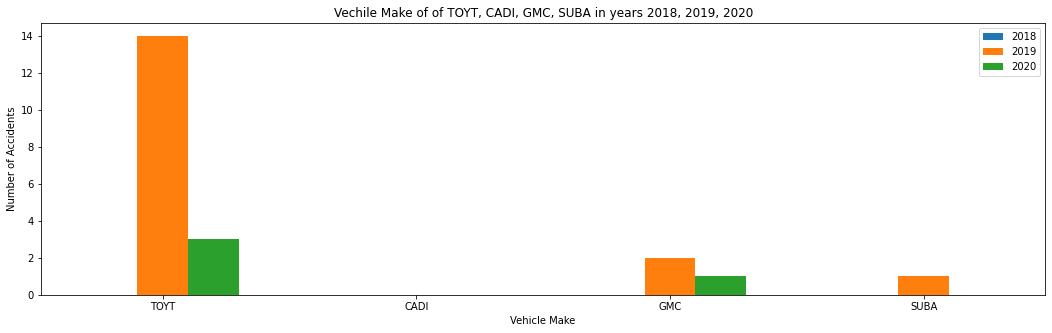

In [92]:
X = ['TOYT', 'CADI', 'GMC', 'SUBA'] # labels of to be plotted.
no_of_accidents_2018 = [sd_2018[sd_2018['VEHICLE_MAKE'] =='TOYT'].shape[0],
                        sd_2018[sd_2018['VEHICLE_MAKE'] =='CADI'].shape[0],
                        sd_2018[sd_2018['VEHICLE_MAKE'] =='GMC'].shape[0],
                        sd_2018[sd_2018['VEHICLE_MAKE'] =='SUBA'].shape[0]]
no_of_accidents_2019 = [sd_2019[sd_2019['VEHICLE_MAKE'] =='TOYT'].shape[0],
                        sd_2019[sd_2019['VEHICLE_MAKE'] =='CADI'].shape[0],
                        sd_2019[sd_2019['VEHICLE_MAKE'] =='GMC'].shape[0],
                        sd_2019[sd_2019['VEHICLE_MAKE'] =='SUBA'].shape[0]]
no_of_accidents_2020 = [sd_2020[sd_2020['VEHICLE_MAKE'] =='TOYT'].shape[0],
                        sd_2020[sd_2020['VEHICLE_MAKE'] =='CADI'].shape[0],
                        sd_2020[sd_2020['VEHICLE_MAKE'] =='GMC'].shape[0],
                        sd_2020[sd_2020['VEHICLE_MAKE'] =='SUBA'].shape[0]]
 
X_axis = np.arange( len(X))
 
plt.bar(X_axis-0.2, no_of_accidents_2018, 0.2, label = '2018')
plt.bar(X_axis, no_of_accidents_2019, 0.2, label = '2019')
plt.bar(X_axis + 0.2, no_of_accidents_2020, 0.2, label = '2020')
 
plt.xticks(X_axis, X)
plt.xlabel("Vehicle Make")
plt.ylabel("Number of Accidents" )
plt.title("Vechile Make of of TOYT, CADI, GMC, SUBA in years 2018, 2019, 2020")
plt.legend()
plt.show()

In [93]:
sd_2020[sd_2020['VEHICLE_MAKE'] =='GMC'].shape[0] #1
sd_2019[sd_2019['VEHICLE_MAKE'] =='GMC'].shape[0] #
#Hence our graph is correct since we are getting the same results as of value_counts of the sample data GMC = 3 which is distributed among 2 in 2019 and 1 in 2020.

2

## when we are comparing the value_counts of sample data with the data that we obtained from the graph we can understand that it is correct.

#**Analysis 1 ( Vechile Make vs Accidents in year 2018, 2019, 2020) for the Orginal data.**

In [94]:
# Converting the data into 3 groups according to the year in which the accident happened.
df_2018 = data[data['YEAR'] == 2018]
df_2019 = data[data['YEAR'] == 2019]
df_2020 = data[data['YEAR'] == 2020]
df_2018.shape,df_2019.shape, df_2020.shape

((141351, 26), (377495, 26), (128870, 26))

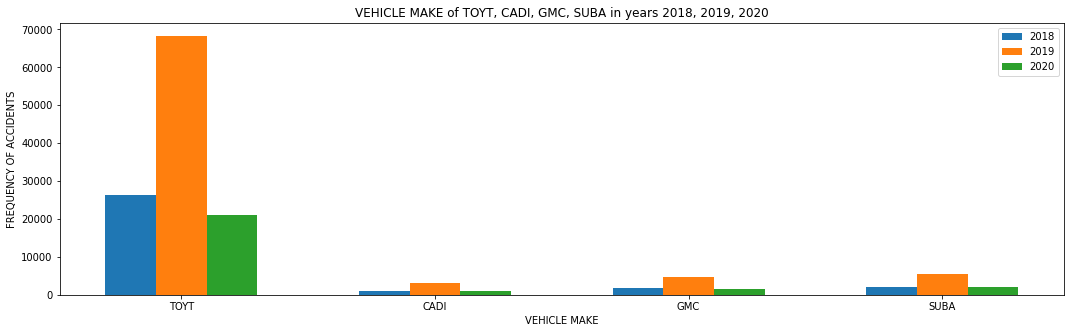

In [95]:
X = ['TOYT', 'CADI', 'GMC', 'SUBA'] # labels of to be plotted.
no_of_accidents_2018 = [df_2018[df_2018['VEHICLE_MAKE'] =='TOYT'].shape[0],
                        df_2018[df_2018['VEHICLE_MAKE'] =='CADI'].shape[0],
                        df_2018[df_2018['VEHICLE_MAKE'] =='GMC'].shape[0],
                        df_2018[df_2018['VEHICLE_MAKE'] =='SUBA'].shape[0]]
no_of_accidents_2019 = [df_2019[df_2019['VEHICLE_MAKE'] =='TOYT'].shape[0],
                        df_2019[df_2019['VEHICLE_MAKE'] =='CADI'].shape[0],
                        df_2019[df_2019['VEHICLE_MAKE'] =='GMC'].shape[0],
                        df_2019[df_2019['VEHICLE_MAKE'] =='SUBA'].shape[0]]
no_of_accidents_2020 = [df_2020[df_2020['VEHICLE_MAKE'] =='TOYT'].shape[0],
                        df_2020[df_2020['VEHICLE_MAKE'] =='CADI'].shape[0],
                        df_2020[df_2020['VEHICLE_MAKE'] =='GMC'].shape[0],
                        df_2020[df_2020['VEHICLE_MAKE'] =='SUBA'].shape[0]]
 
X_axis = np.arange( len(X))
 
plt.bar(X_axis-0.2, no_of_accidents_2018, 0.2, label = '2018')
plt.bar(X_axis, no_of_accidents_2019, 0.2, label = '2019')
plt.bar(X_axis + 0.2, no_of_accidents_2020, 0.2, label = '2020')
 
plt.xticks(X_axis, X)
plt.xlabel("VEHICLE MAKE")
plt.ylabel("FREQUENCY OF ACCIDENTS" )
plt.title("VEHICLE MAKE of TOYT, CADI, GMC, SUBA in years 2018, 2019, 2020")
plt.legend()
plt.show()

# The accidents for TOYOTA is maximum in 2019 but we can't say since we only took 4 months of data of 2018 and 8 months for 2020. The conclusion that we can get is that TOYOTA is the vehicle that got into accidents mostly when compared with CADI, GMC and SUBA with a high margin.

#**Analysis 2 ( Vechile Make vs Months) for sample data.**

In [96]:
sample_data['VEHICLE_MAKE'].value_counts()

TOYT         17
HONDA        14
NISSAN       12
FORD         10
CHEVROLET     5
INFI          4
DODGE         4
MERZ          3
GMC           3
VOLK          3
MAC           3
CHRY          2
LNDR          2
JEEP          2
HINO          2
BMW           2
NIU           1
hino          1
bus           1
LEXS          1
SUBA          1
GREYHOUND     1
VOLV          1
AUDI          1
YAMA          1
MITS          1
LINC          1
ORION         1
Name: VEHICLE_MAKE, dtype: int64

In [97]:
# Split the dataframe into 4 dataframe using the vehicle make condition and then take the value_counts for the analysis.
sd_TOYT = sample_data[sample_data['VEHICLE_MAKE'] == 'TOYT']
sd_CADI = sample_data[sample_data['VEHICLE_MAKE'] == 'CADI']
sd_GMC = sample_data[sample_data['VEHICLE_MAKE'] == 'GMC']
sd_SUBA = sample_data[sample_data['VEHICLE_MAKE'] == 'SUBA']

In [98]:
sd_TOYT['MONTH'].value_counts()

1     3
2     3
6     3
11    2
12    2
10    1
7     1
3     1
5     1
Name: MONTH, dtype: int64

In [99]:
a = sd_TOYT['MONTH'].value_counts().to_dict()
print(a)

{1: 3, 2: 3, 6: 3, 11: 2, 12: 2, 10: 1, 7: 1, 3: 1, 5: 1}


In [100]:
x = [1, 2, 3, 4, 5, 6 ,7 ,8, 9, 10, 11, 12]
m ={k: 0 for v, k in enumerate(x)}
# Making a dictionary with keys as months and values as 0 which are going to be updated.

In [101]:
m.update(a)
print(m)

{1: 3, 2: 3, 3: 1, 4: 0, 5: 1, 6: 3, 7: 1, 8: 0, 9: 0, 10: 1, 11: 2, 12: 2}


In [102]:
# Function to return the frequency of accidents in each month with zero as values for months in which there is no accidents.
def monthly_accidents(Vehile_column):
  a = Vehile_column.value_counts().to_dict()
  x = [1, 2, 3, 4, 5, 6 ,7 ,8, 9, 10, 11, 12]
  m = {k: 0 for v, k in enumerate(x)}
  m.update(a)
  return list(m.values())

print(monthly_accidents(sd_TOYT['MONTH']))

[3, 3, 1, 0, 1, 3, 1, 0, 0, 1, 2, 2]


In [104]:
a = sd_CADI['MONTH'].value_counts().to_dict()
print(a)
# There is no value for CADI in the graph too as well as other values are plotted correctly thus the graph is correct.

{}


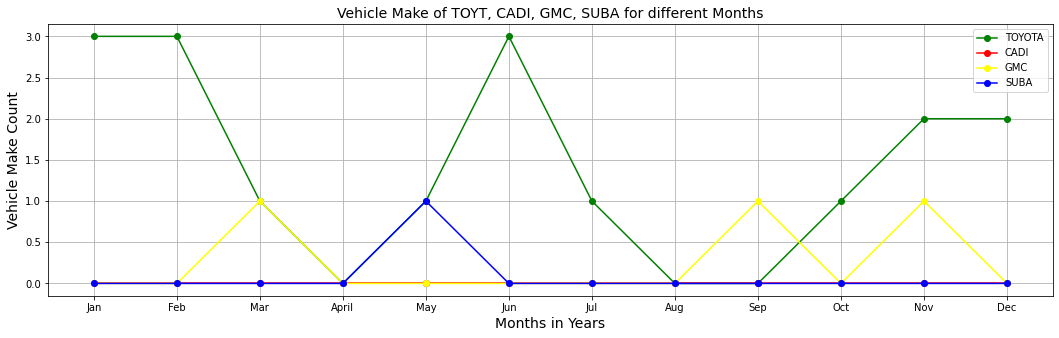

In [110]:
X = [1, 2, 3, 4, 5, 6 ,7 ,8, 9, 10, 11, 12]
TOYT = monthly_accidents(sd_TOYT['MONTH'])
CADI = monthly_accidents(sd_CADI['MONTH'])
GMC = monthly_accidents(sd_GMC['MONTH'])
SUBA = monthly_accidents(sd_SUBA['MONTH'])


plot1, = plt.plot(X, TOYT, color='green', marker='o')
plot2, = plt.plot(X, CADI, color='red', marker='o')
plot3, = plt.plot(X, GMC, color='yellow', marker='o')
plot4, = plt.plot(X, SUBA, color='blue', marker='o')
plt.rcParams["figure.figsize"] = (18,10)
plt.xticks(ticks =X, labels = ['Jan', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Vehicle Make of TOYT, CADI, GMC, SUBA for different Months', fontsize=14)
plt.xlabel('Months in Years', fontsize=14)
plt.ylabel('Vehicle Make Count', fontsize=14)
plt.legend([plot1, plot2, plot3, plot4], ['TOYOTA', 'CADI', 'GMC', 'SUBA'])
plt.grid(True)
plt.show()

#**Analysis 2 ( Vechile Make vs Months) for Orginal data.**

In [111]:
# Split the dataframe into 4 dataframe using the vehicle make condition and then take the value_counts for th eanalysis.
df_TOYT = data[data['VEHICLE_MAKE'] == 'TOYT']
df_CADI = data[data['VEHICLE_MAKE'] == 'CADI']
df_GMC = data[data['VEHICLE_MAKE'] == 'GMC']
df_SUBA = data[data['VEHICLE_MAKE'] == 'SUBA']

In [112]:
df_TOYT['MONTH'].value_counts()

10    12360
12    12275
11    12068
9     11731
1     10304
2      9853
3      9051
6      8112
7      7949
5      7743
8      7734
4      6488
Name: MONTH, dtype: int64

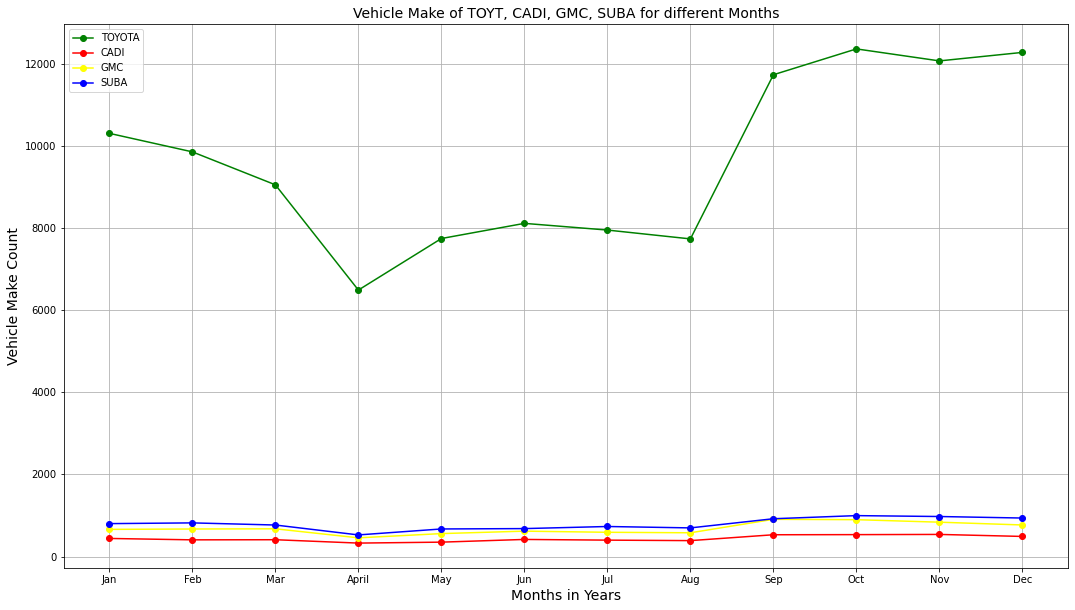

In [114]:
X = [1, 2, 3, 4, 5, 6 ,7 ,8, 9, 10, 11, 12]
TOYT = monthly_accidents(df_TOYT['MONTH'])
CADI = monthly_accidents(df_CADI['MONTH'])
GMC = monthly_accidents(df_GMC['MONTH'])
SUBA = monthly_accidents(df_SUBA['MONTH'])


plot1, = plt.plot(X, TOYT, color='green', marker='o')
plot2, = plt.plot(X, CADI, color='red', marker='o')
plot3, = plt.plot(X, GMC, color='yellow', marker='o')
plot4, = plt.plot(X, SUBA, color='blue', marker='o')
plt.rcParams["figure.figsize"] = (18,10)
plt.xticks(ticks =X, labels = ['Jan', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Vehicle Make of TOYT, CADI, GMC, SUBA for different Months', fontsize=14)
plt.xlabel('Months in Years', fontsize=14)
plt.ylabel('Vehicle Make Count', fontsize=14)
plt.legend([plot1, plot2, plot3, plot4], ['TOYOTA', 'CADI', 'GMC', 'SUBA'])
plt.grid(True)
plt.show()

## We can identify from the line graph that VEHICLE MAKE TOYATA has the maximum no of accidents in this period and other VEHICLE MAKE are almost similar. VEHICLE MAKE CADI is the one which has least accidents. We are not able to properly tell which month has more accidents since the data interval we took contains 4 months from 2018, All the months of 2019, and 8 months of 2020. So we need to plot year wise monthly analysis.

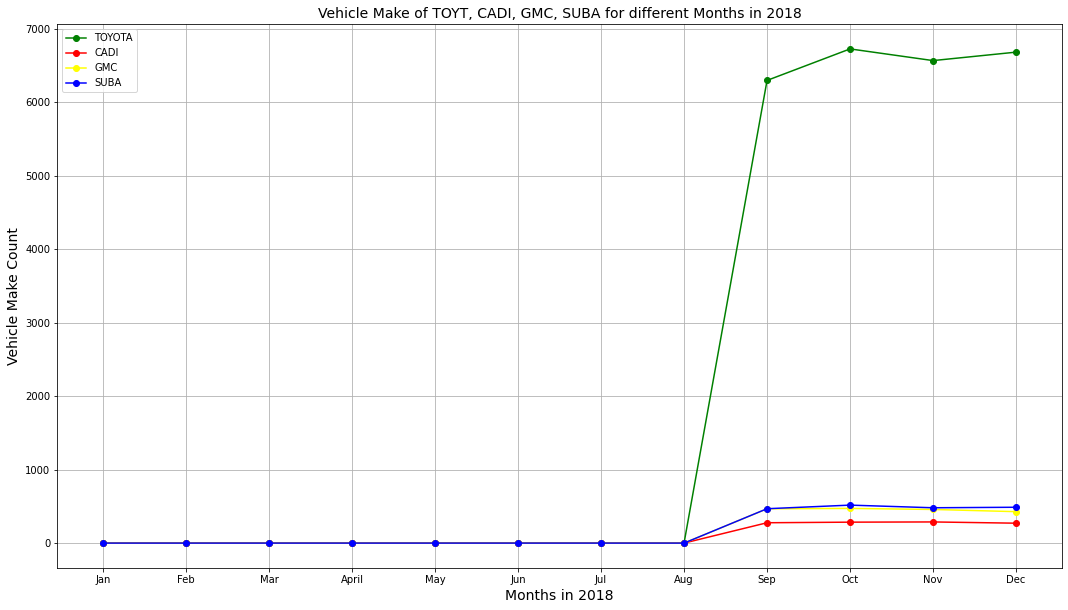

In [115]:
df_2018_TOYT = df_2018[df_2018['VEHICLE_MAKE'] == 'TOYT']
df_2018_CADI = df_2018[df_2018['VEHICLE_MAKE'] == 'CADI']
df_2018_GMC = df_2018[df_2018['VEHICLE_MAKE'] == 'GMC']
df_2018_SUBA = df_2018[df_2018['VEHICLE_MAKE'] == 'SUBA']

X = [1, 2, 3, 4, 5, 6 ,7 ,8, 9, 10, 11, 12]
TOYT = monthly_accidents(df_2018_TOYT['MONTH'])
CADI = monthly_accidents(df_2018_CADI['MONTH'])
GMC = monthly_accidents(df_2018_GMC['MONTH'])
SUBA = monthly_accidents(df_2018_SUBA['MONTH'])


plot1, = plt.plot(X, TOYT, color='green', marker='o')
plot2, = plt.plot(X, CADI, color='red', marker='o')
plot3, = plt.plot(X, GMC, color='yellow', marker='o')
plot4, = plt.plot(X, SUBA, color='blue', marker='o')
plt.rcParams["figure.figsize"] = (18,10)
plt.xticks(ticks =X, labels = ['Jan', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Vehicle Make of TOYT, CADI, GMC, SUBA for different Months in 2018', fontsize=14)
plt.xlabel('Months in 2018', fontsize=14)
plt.ylabel('Vehicle Make Count', fontsize=14)
plt.legend([plot1, plot2, plot3, plot4], ['TOYOTA', 'CADI', 'GMC', 'SUBA'])
plt.grid(True)
plt.show()

# Toyota is the VEHICLE MAKE that got into accidents mostly in the months of 2018. 




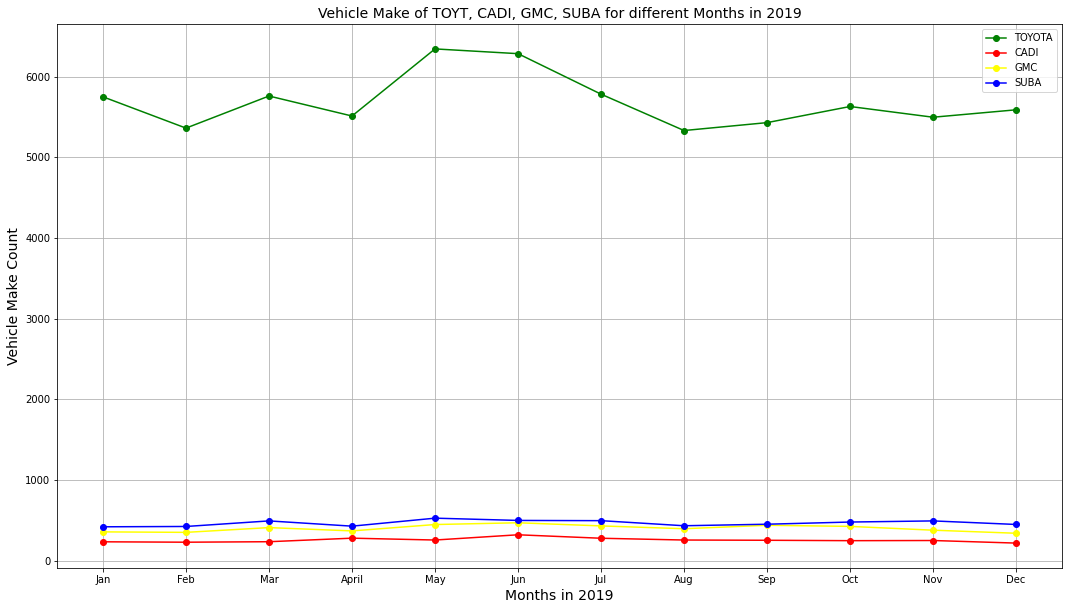

In [116]:
df_2019_TOYT =df_2019[df_2019['VEHICLE_MAKE'] == 'TOYT']
df_2019_CADI =df_2019[df_2019['VEHICLE_MAKE'] == 'CADI']
df_2019_GMC =df_2019[df_2019['VEHICLE_MAKE'] == 'GMC']
df_2019_SUBA =df_2019[df_2019['VEHICLE_MAKE'] == 'SUBA']

X = [1, 2, 3, 4, 5, 6 ,7 ,8, 9, 10, 11, 12]
TOYT = monthly_accidents(df_2019_TOYT['MONTH'])
CADI = monthly_accidents(df_2019_CADI['MONTH'])
GMC = monthly_accidents(df_2019_GMC['MONTH'])
SUBA = monthly_accidents(df_2019_SUBA['MONTH'])


plot1, = plt.plot(X, TOYT, color='green', marker='o')
plot2, = plt.plot(X, CADI, color='red', marker='o')
plot3, = plt.plot(X, GMC, color='yellow', marker='o')
plot4, = plt.plot(X, SUBA, color='blue', marker='o')
plt.rcParams["figure.figsize"] = (18,10)
plt.xticks(ticks =X, labels = ['Jan', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Vehicle Make of TOYT, CADI, GMC, SUBA for different Months in 2019', fontsize=14)
plt.xlabel('Months in 2019', fontsize=14)
plt.ylabel('Vehicle Make Count', fontsize=14)
plt.legend([plot1, plot2, plot3, plot4], ['TOYOTA', 'CADI', 'GMC', 'SUBA'])
plt.grid(True)
plt.show()

## Maximum accidents occured in the month of May in 2019 for TOYOTA, But for all the months the accidents of TOYOTA is very high compared to all other VEHICLE MAKE.

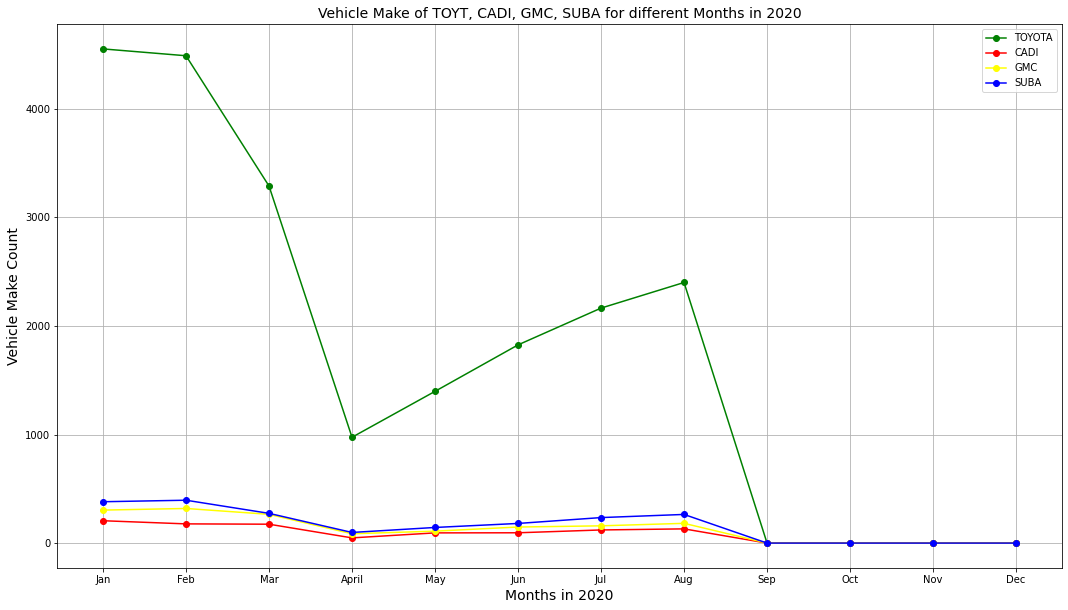

In [117]:
df_2020_TOYT =df_2020[df_2020['VEHICLE_MAKE'] == 'TOYT']
df_2020_CADI =df_2020[df_2020['VEHICLE_MAKE'] == 'CADI']
df_2020_GMC =df_2020[df_2020['VEHICLE_MAKE'] == 'GMC']
df_2020_SUBA =df_2020[df_2020['VEHICLE_MAKE'] == 'SUBA']

X = [1, 2, 3, 4, 5, 6 ,7 ,8, 9, 10, 11, 12]
TOYT = monthly_accidents(df_2020_TOYT['MONTH']) # Returns a list of values of 12 months.
CADI = monthly_accidents(df_2020_CADI['MONTH'])
GMC = monthly_accidents(df_2020_GMC['MONTH'])
SUBA = monthly_accidents(df_2020_SUBA['MONTH'])


plot1, = plt.plot(X, TOYT, color='green', marker='o')
plot2, = plt.plot(X, CADI, color='red', marker='o')
plot3, = plt.plot(X, GMC, color='yellow', marker='o')
plot4, = plt.plot(X, SUBA, color='blue', marker='o')
plt.rcParams["figure.figsize"] = (18,10)
plt.xticks(ticks =X, labels = ['Jan', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Vehicle Make of TOYT, CADI, GMC, SUBA for different Months in 2020', fontsize=14)
plt.xlabel('Months in 2020', fontsize=14)
plt.ylabel('Vehicle Make Count', fontsize=14)
plt.legend([plot1, plot2, plot3, plot4], ['TOYOTA', 'CADI', 'GMC', 'SUBA'])
plt.grid(True)
plt.show()

https://www.driversautomart.com/why-is-the-toyota-brand-so-popular-among-consumers/

1.   Toyota is very popular vehicle in usa as it builds solid, efficient, and reliable vehicles as per consumer reports. This can be the main reason for increased no of accidents as the VEHICLE MAKE 'TOYATA' is used by a major population. Thus, our analysis of the data is valid.

## In initial months of 2020, we can see that all the VEHICLE MAKE accidents got declined rapidly. This decline in accidents is due to impact of COVID-19 pandemic. We can see from the above graph that, the accidents started declining from January and reached a bottom threshold at April. 

https://en.wikipedia.org/wiki/COVID-19_pandemic_in_New_York_City


According to the data from internet we can see that the coronavirus has been spreading in newyork city from january.
 

1.   **By March 29, over 30,000 cases were confirmed** 
2.   **Starting March 16, New York City schools were closed.**
3.   **On March 20, the New York State governor's office issued an executive order closing "non-essential" businesses.**

These were the reasons for maximum rate of decline in accidents in the month of March and April, people started to go out only for survival needs.






#**Analysis 3 ( Vechile TYPE vs Accidents Frequency) for sample data.**

In [118]:
sample_data['VEHICLE_TYPE'].value_counts()

SEDAN                    45
SPORT UTILITY VEHICLE    35
TRUCK                    10
TAXI                      5
BUS                       3
BIKE                      2
Name: VEHICLE_TYPE, dtype: int64

Enter the no of portion of the pie chart to be exploded out 3
The width in which exploding to happen (0.1-0.5).2


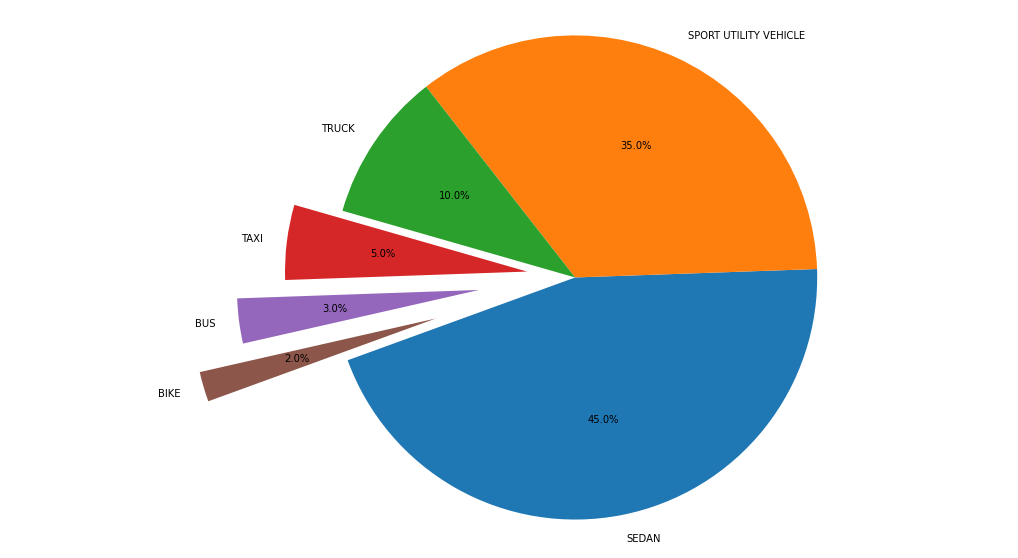

In [123]:
data_dict = sample_data['VEHICLE_TYPE'].value_counts().to_dict() # Converting the value counts of VEHICLE TYPE into a dictionary.
labels = [] 
sizes = []
K = int(input('Enter the no of portion of the pie chart to be exploded out ')) # We can give input to k so that the smallest frequency of vehicle type will be exploded out.
p = float(input('The width in which exploding to happen (0.1-0.5)'))
for x, y in data_dict.items():
    labels.append(x)
    sizes.append(y)
explode = list(np.zeros(len(sizes))) # Made a list of 0 for explode equal to the size of sizes.
small_indexes = sorted(range(len(sizes)), key = lambda sub: sizes[sub])[:K] # An algorithm to return out the smallest k indices from the sizes list.
for count, ele in enumerate(small_indexes[::-1], 1):
  explode[ele] = p* count # Respective index values of the explode gets replace by the p.

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=200) # pie chart syntax with different parameters.
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#**Analysis 3 ( Vechile TYPE vs Accidents Frequency) for the data between 1st September 2018 to 31st August 2020.**

In [124]:
data['VEHICLE_TYPE'].value_counts()

SEDAN                    296860
SPORT UTILITY VEHICLE    257926
TRUCK                     42894
TAXI                      29501
BUS                        9936
VAN                        4193
MOTORCYCLE                 3367
PASSENGER VEHICLE          2190
BIKE                        839
BICYCLE                      10
Name: VEHICLE_TYPE, dtype: int64

Enter the no of portion of the pie chart to be exploded out 7
The width in which exploding to happen (0.1-1).1


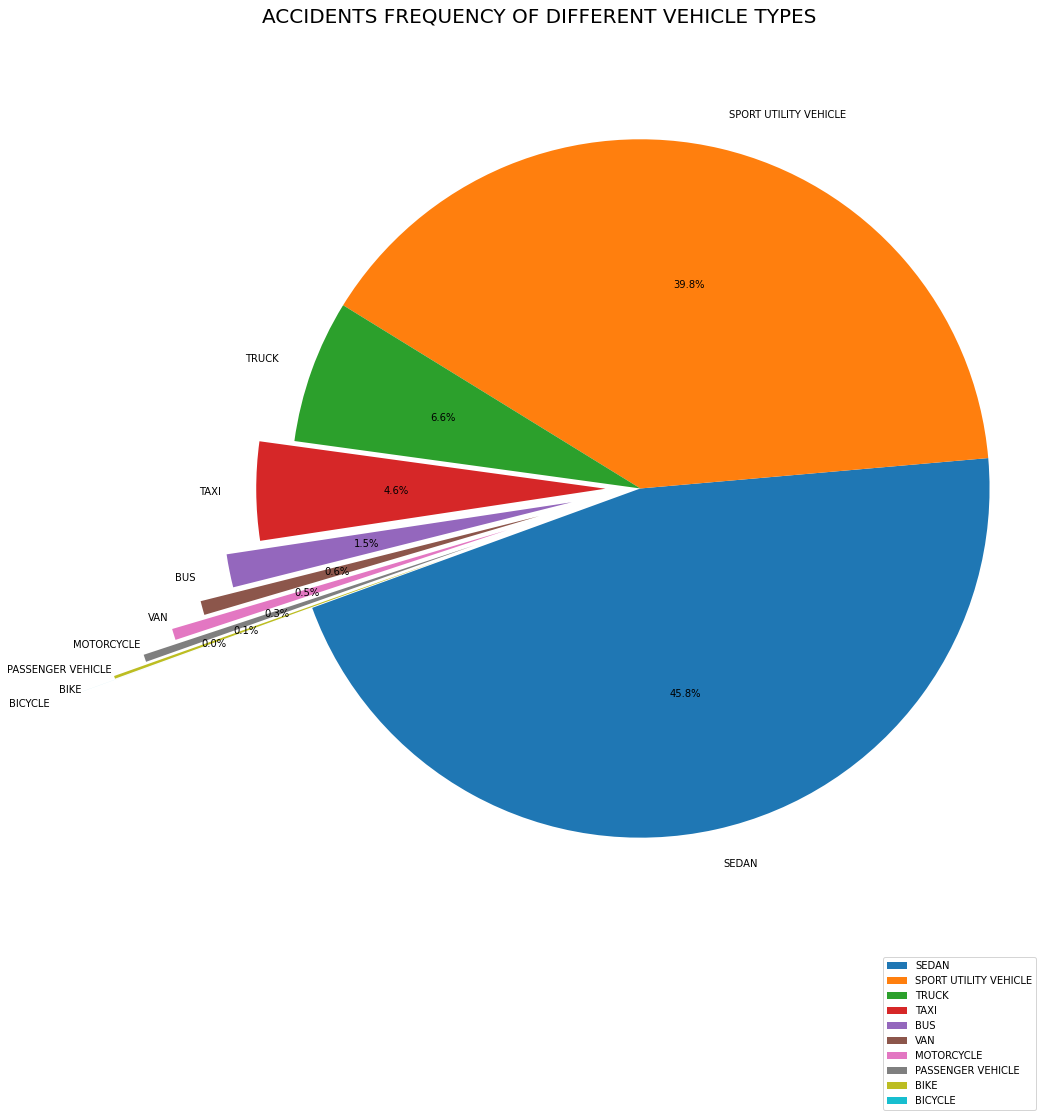

In [126]:
data_dict = data['VEHICLE_TYPE'].value_counts().to_dict() # Converting the value counts of VEHICLE TYPE into a dictionary.

labels = [] 
sizes = []

K = int(input('Enter the no of portion of the pie chart to be exploded out ')) # We can give input to k so that the smallest frequency of vehicle type will be exploded out.
p = float(input('The width in which exploding to happen (0.1-1)'))
for x, y in data_dict.items():
    labels.append(x)
    sizes.append(y)
explode = list(np.zeros(len(sizes))) # Made a list of 0 for explode equal to the size of sizes.
small_indexes = sorted(range(len(sizes)), key = lambda sub: sizes[sub])[:K] # An algorithm to return out the smallest k indices from the sizes list.
for count, ele in enumerate(small_indexes[::-1], 1):
  explode[ele] = p* count # Respective index values of the explode gets replace by the p.
plt.rcParams["figure.figsize"] = (18, 17) # Increasing the size of the pie chart.

fig1, ax1 = plt.subplots()
pie = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=200) # pie chart syntax with different parameters.

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(label='ACCIDENTS FREQUENCY OF DIFFERENT VEHICLE TYPES', fontsize=20)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0), loc='best')
plt.show()

## From the pie chart we can see that the maximum accidents were occured by SEDAN and the least by BICYCLE.

In [128]:
cleaned_data = data.to_csv('/content/drive/MyDrive/Cleaned_data.csv')